# Assignment 2.2: Occupancy Map


TEAM-ID: 16 <br>
TEAM-NAME: spacex  <br>
YOUR-ID: 2019121004 , 2018102002  <br>
YOUR-NAME: Avani Gupta, Sreeharsha Paruchuri  <br> 

In [1]:
import open3d as o3d
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils

In [2]:
def one_one(file):
    pcd = o3d.io.read_point_cloud(file)
    o3d.visualization.draw_geometries([pcd])
    return pcd
path = '../Assignment_2.1/'
pcdf = one_one(path+"pcd.ply")

In [3]:
def find_occMap(pcdf):
    points = np.asarray(pcdf.points)
    #o3d.visualization.draw_geometries([pcdf])
    print(points.shape)
    occMap = np.zeros((300, 300))
    maxX = 0
    maxY = 0
    maxZ = 0
    minX = 1000
    minY = 1000
    minZ = 1000
    for p in points:
        occMap[int(p[0]) + 100][int(p[2]) + 100] += 1
        if maxX < p[0]:
            maxX = p[0]
        if maxY < p[1]:
            maxY = p[1]
        if maxZ < p[2]:
            maxZ = p[2]
        if minX > p[0]:
            minX = p[0]
        if minY > p[1]:
            minY = p[1]
        if minZ > p[2]:
            minZ = p[2]
    print(f"min x {minX} max X {maxX} min y {minY} max y {maxY} minZ {minZ} and maxZ {maxZ}")
    return occMap

occMap = find_occMap(pcdf)

(9413461, 3)
min x -77.49911518336532 max X 177.9269244256979 min y -11.930918524303983 max y 22.898198714668997 minZ -68.38093484929182 and maxZ 100.62347093273537


In [5]:
def plot_occMap(name,occMap):
    for i in range(200):
        for j in range(200):
            if occMap[i][j] > 0 :
                occMap[i][j] = 1
            else:
                occMap[i][j] = 0

    fig = plt.figure(figsize=(16,16))
    cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['black','white'],256)
    bounds=[-1,0.5, 2]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    # tell imshow about color map so that only set colors are used
    img = plt.imshow(occMap,interpolation='nearest',cmap = cmap,norm=norm,origin='lower')
    
    # make a color bar
    fig.colorbar(img,cmap=cmap,
                    norm=norm,boundaries=bounds,ticks=[0,1])
  
    plt.savefig(name)
    plt.axis("off") 
    plt.show()
    return occMap

# def save_occMap(img,name):
#     plt.imsave(name,img,cmap = cmap,origin='lower')
    
# save_occMap(img,"combinedMap")

In [6]:
occlist = []
transform = utils.readData("01.txt")
lidar_to_cam = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]]).T
pcdf = o3d.geometry.PointCloud()
for i in range(10,87):
    tr = transform[i, :].reshape((3, 4))
    pc = np.matmul(lidar_to_cam,utils.readPointCloud("01/%06d.bin" % i)[:, :3].T).T
    pad = np.array([[0, 0, 0, 1.0]])
    tf = np.append(tr,pad, axis = 0) 
    ones = np.ones((pc.shape[0], 1))
    pc = np.matmul(tf, np.append(pc, ones, axis = 1).T).T
    pcreshape = pc[:, 3].reshape(-1, 1) 
    pc = pc[:, :3] / pcreshape
    pcd = o3d.geometry.PointCloud() 
    pcd.points = o3d.utility.Vector3dVector(pc)
    occMap = find_occMap(pcd)
    occlist.append(occMap)
    pcdf += pcd

(122829, 3)
min x -77.49911518336532 max X 82.08089977627331 min y -5.4916790057648655 max y 7.137643543996153 minZ -68.38093484929182 and maxZ 87.86740238678635
(122766, 3)
min x -77.14687199730851 max X 83.03559386323595 min y -5.519391061499501 max y 6.617416712418073 minZ -67.60645608768802 and maxZ 88.97417558780772
(122724, 3)
min x -76.50296895393667 max X 83.27755450785992 min y -5.566057088636112 max y 6.988153877694436 minZ -65.96533250790225 and maxZ 89.32792383075554
(122780, 3)
min x -76.06434299931388 max X 84.09987911489691 min y -5.724661459583116 max y 6.4790767139373235 minZ -65.31812205304772 and maxZ 89.78087895566281
(122755, 3)
min x -75.40696987847055 max X 84.57914143845649 min y -6.076480238328114 max y 6.141323265455437 minZ -64.1777874366428 and maxZ 90.55631647748672
(122901, 3)
min x -74.75886455132543 max X 85.19699216448412 min y -6.1706203958367585 max y 5.725153616319495 minZ -63.03808248158617 and maxZ 90.758016262783
(122768, 3)
min x -73.880276943410

min x -23.805625751307574 max X 135.0265237787067 min y -11.28887059361329 max y 3.73470206133996 minZ -36.79709620689012 and maxZ 95.56959469378882
(120576, 3)
min x -22.162113503557336 max X 136.5516546187897 min y -11.869523736821272 max y 3.9458817628446727 minZ -36.65347726331987 and maxZ 96.46156848912469
(120631, 3)
min x -20.775575778831765 max X 138.00436388455893 min y -11.930918524303983 max y 3.789012154074383 minZ -37.053674740526006 and maxZ 96.27601017993993
(120545, 3)
min x -19.25506072889955 max X 139.5197762452982 min y -11.828856813417149 max y 3.737841425591231 minZ -37.19086635149212 and maxZ 95.92124528651009
(120665, 3)
min x -17.834029143807413 max X 141.2046296582596 min y -11.885736807571755 max y 9.544275013028246 minZ -37.184949311545296 and maxZ 95.37599872086545
(120861, 3)
min x -16.169606777564503 max X 142.12121796238625 min y -11.736548489739036 max y 9.001351171055127 minZ -36.72346626131325 and maxZ 94.73025934673149
(120986, 3)
min x -14.4551376583

<ipython-input-5-0ed9f0036eb5>:17: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(img,cmap=cmap,
<ipython-input-5-0ed9f0036eb5>:17: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(img,cmap=cmap,


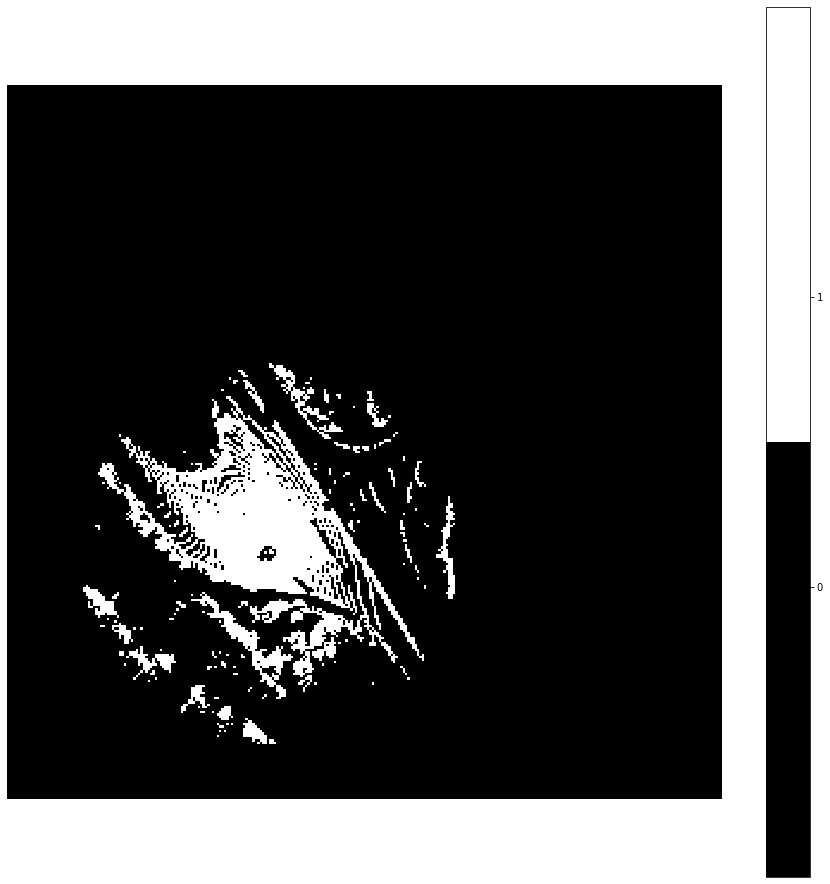

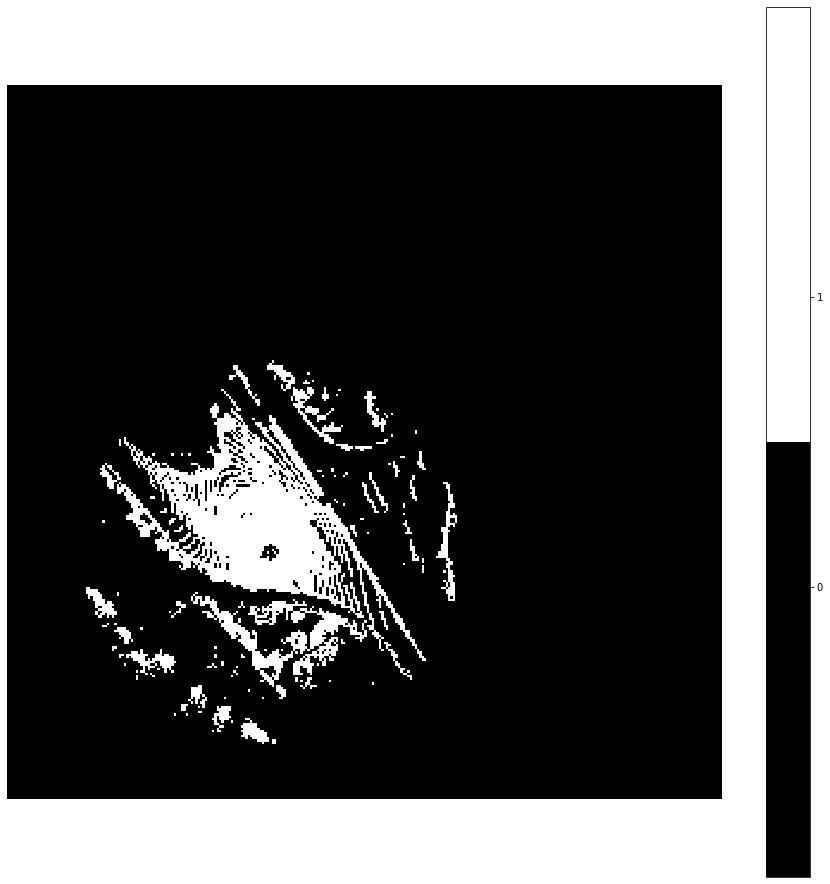

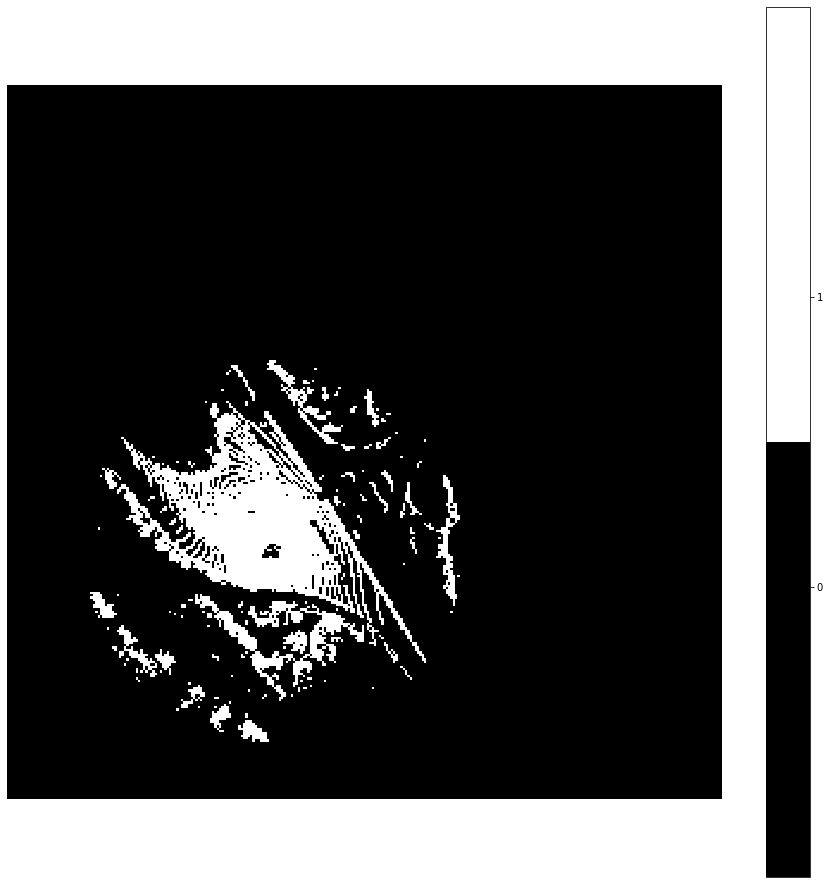

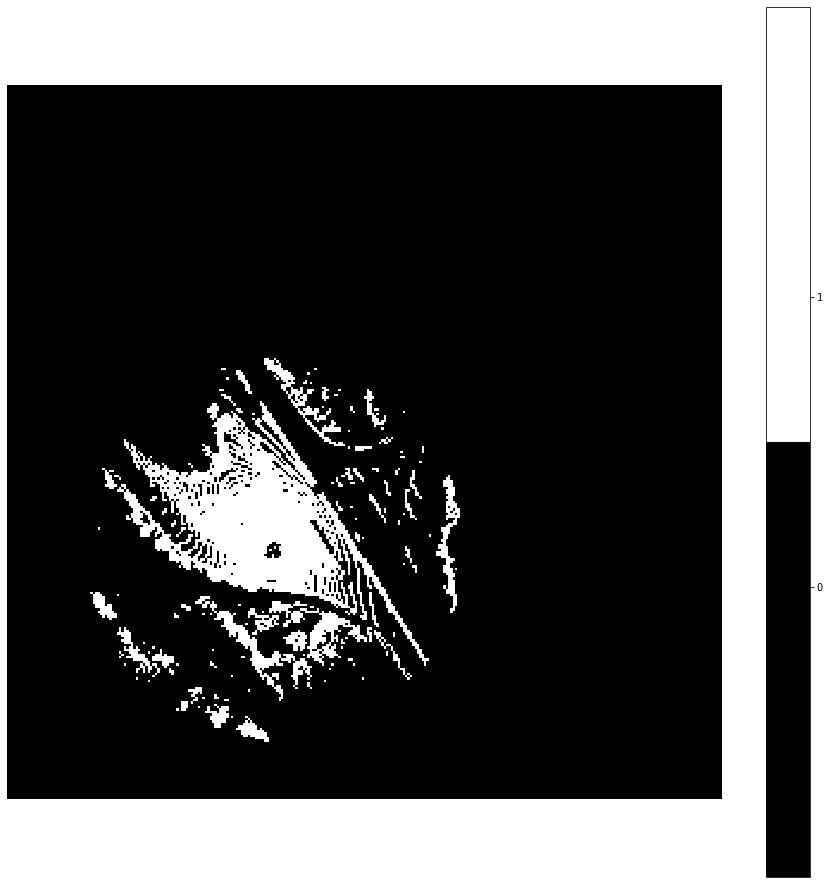

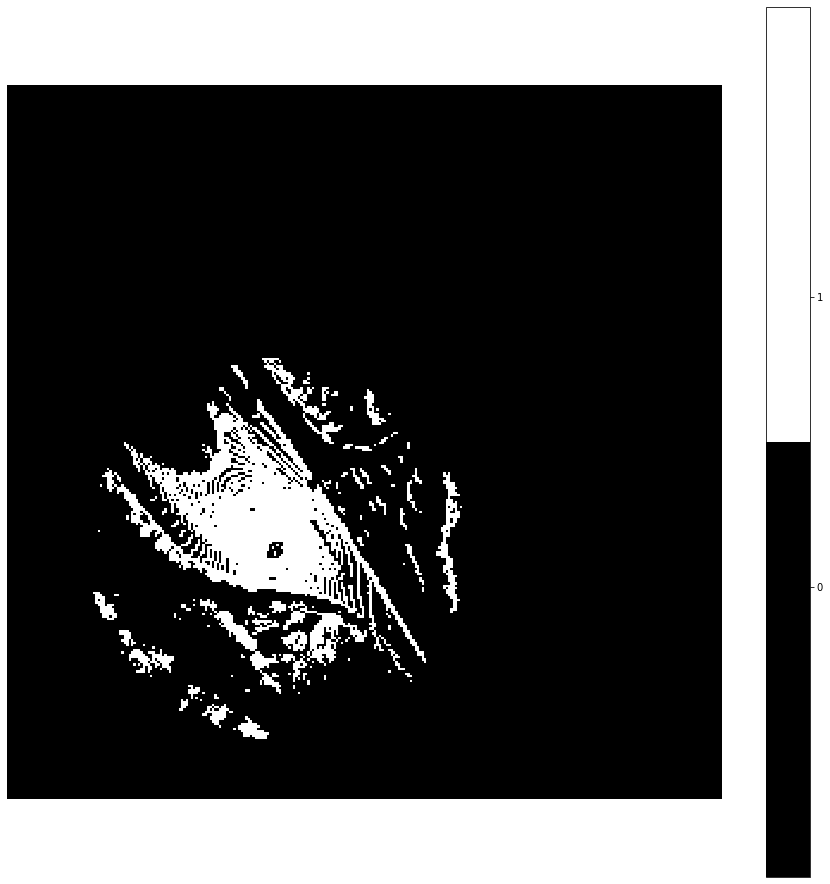

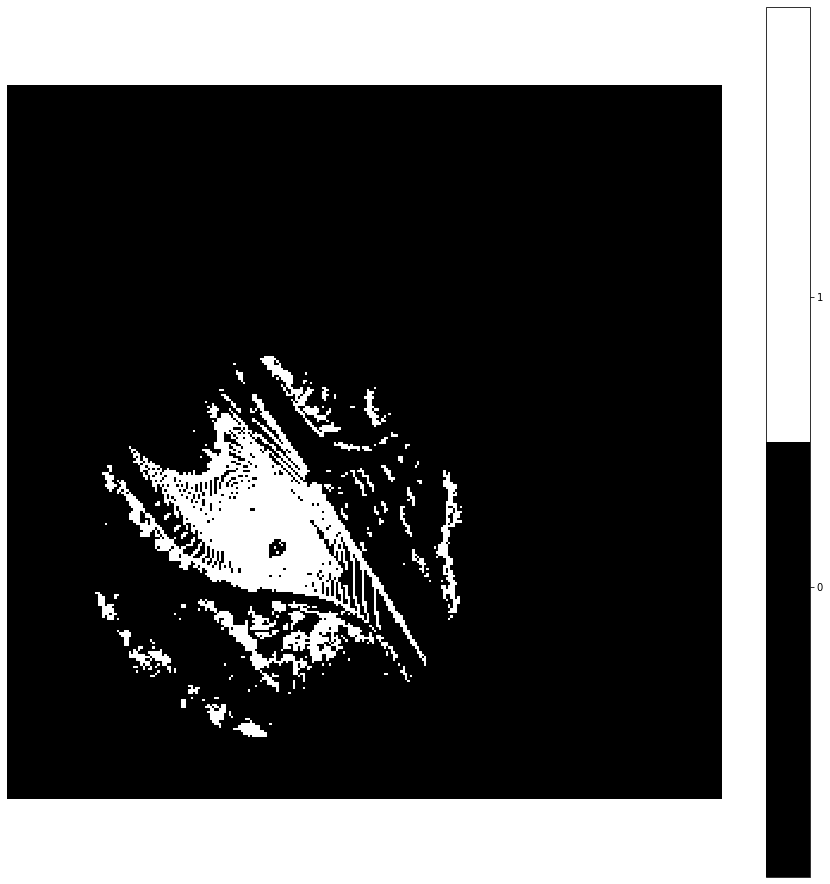

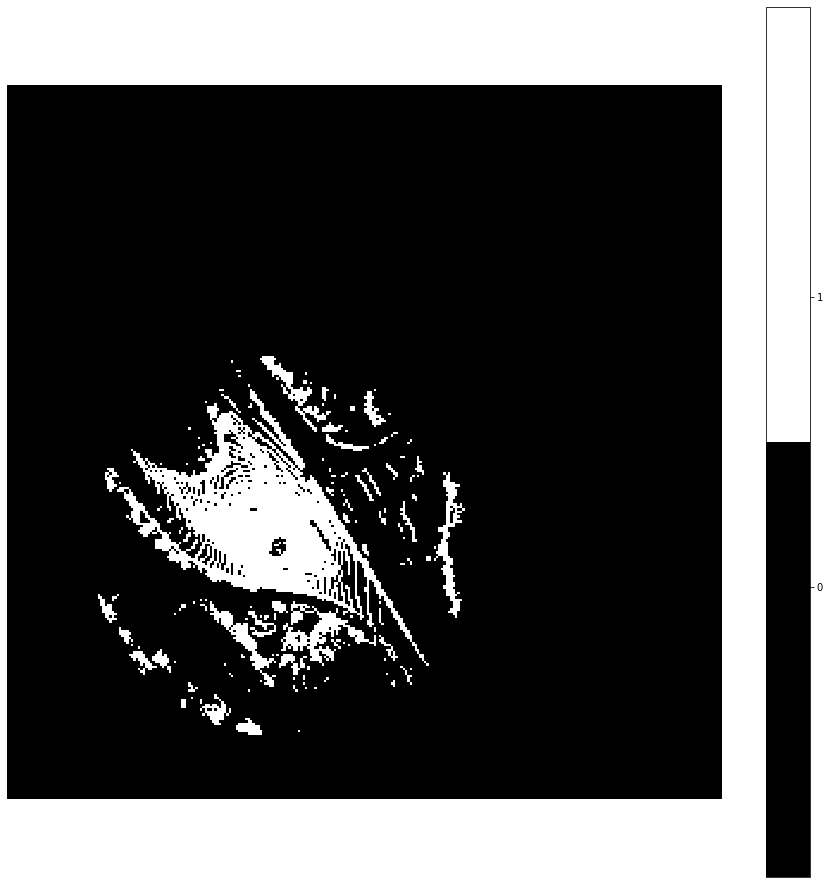

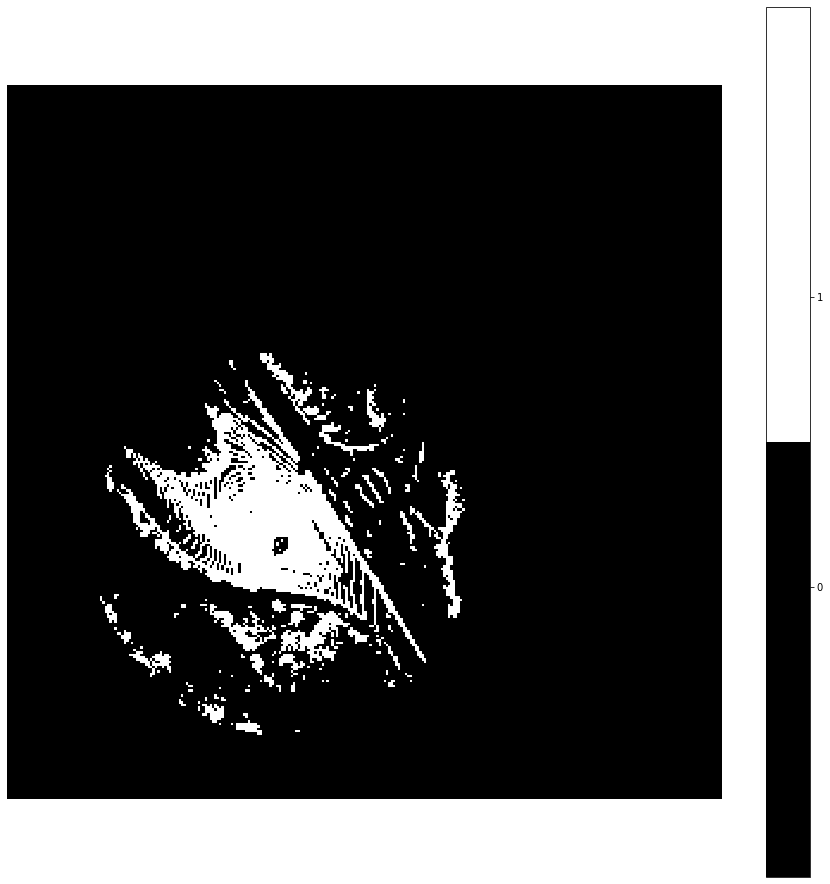

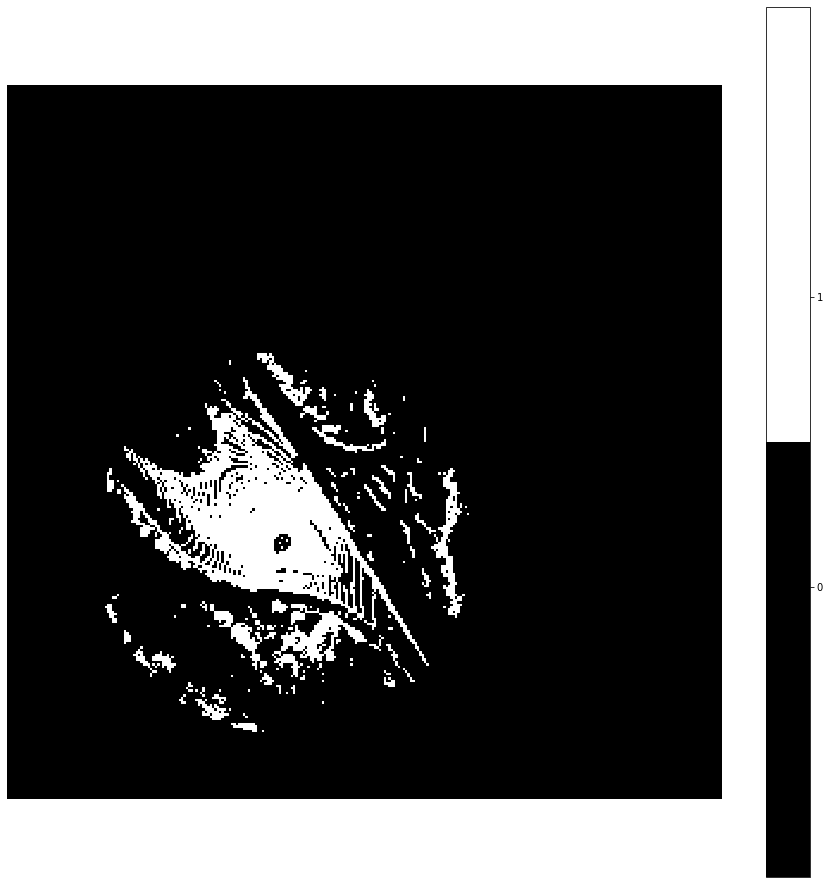

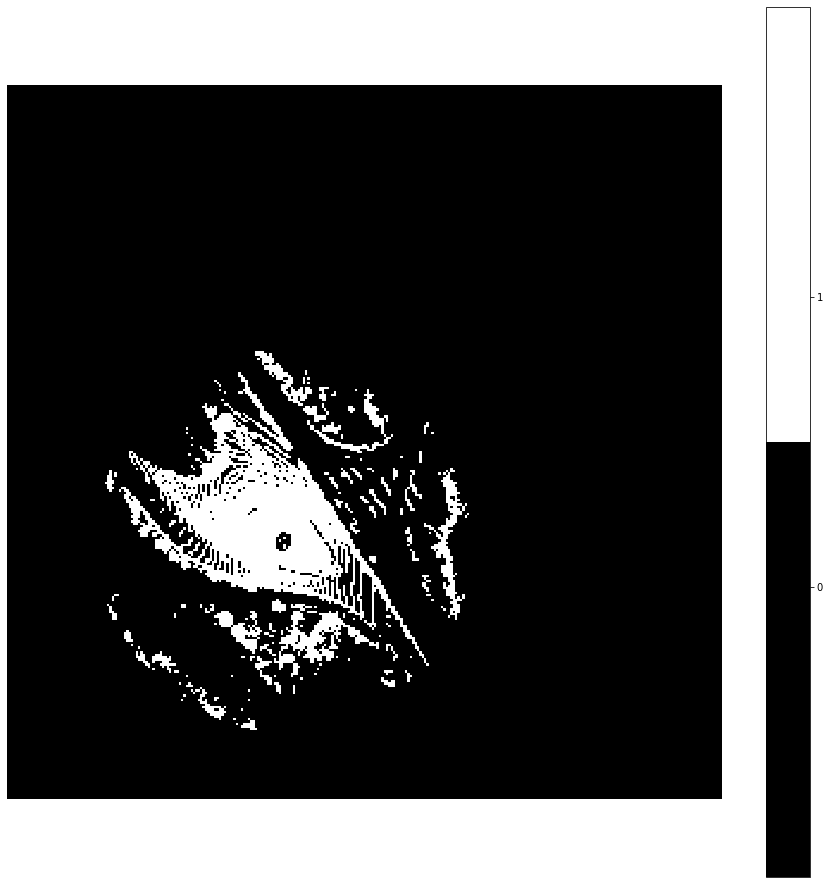

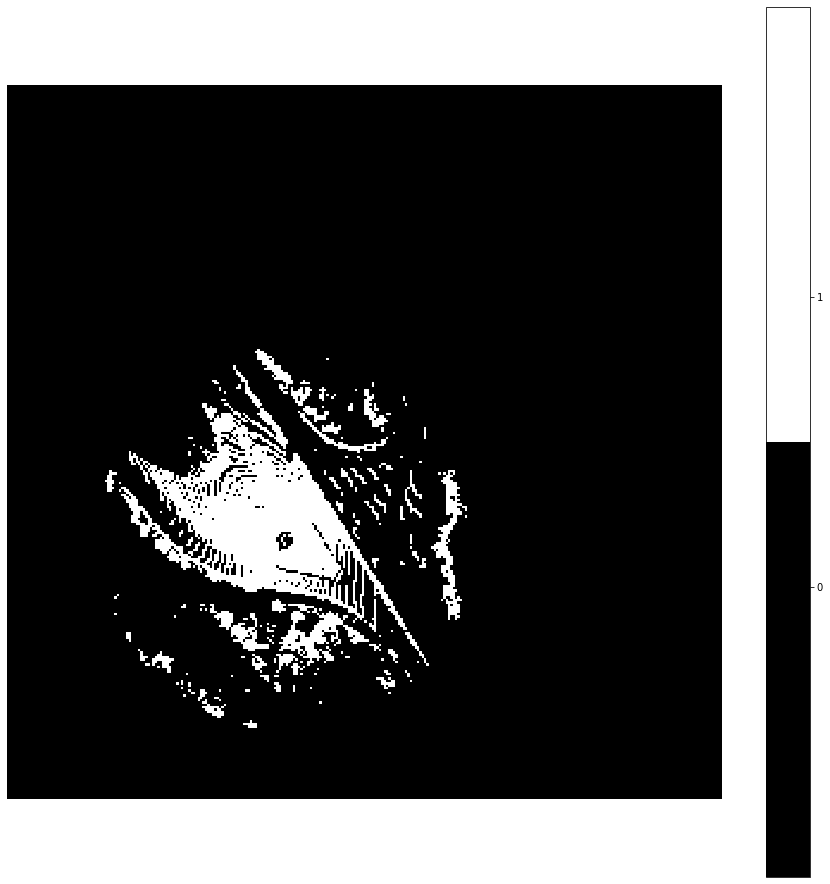

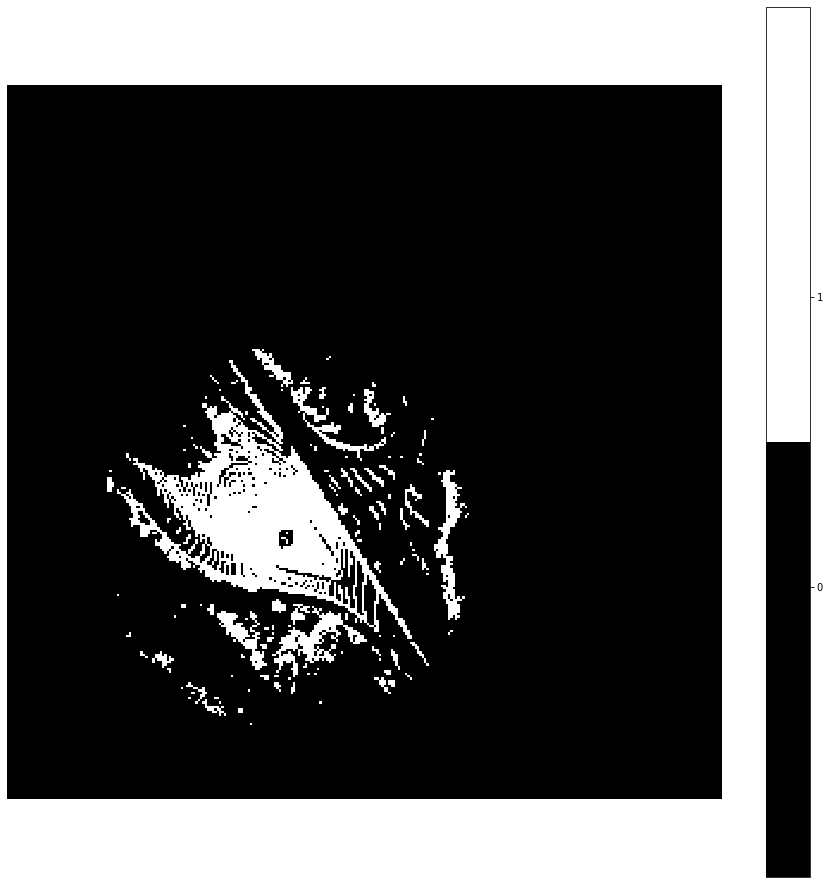

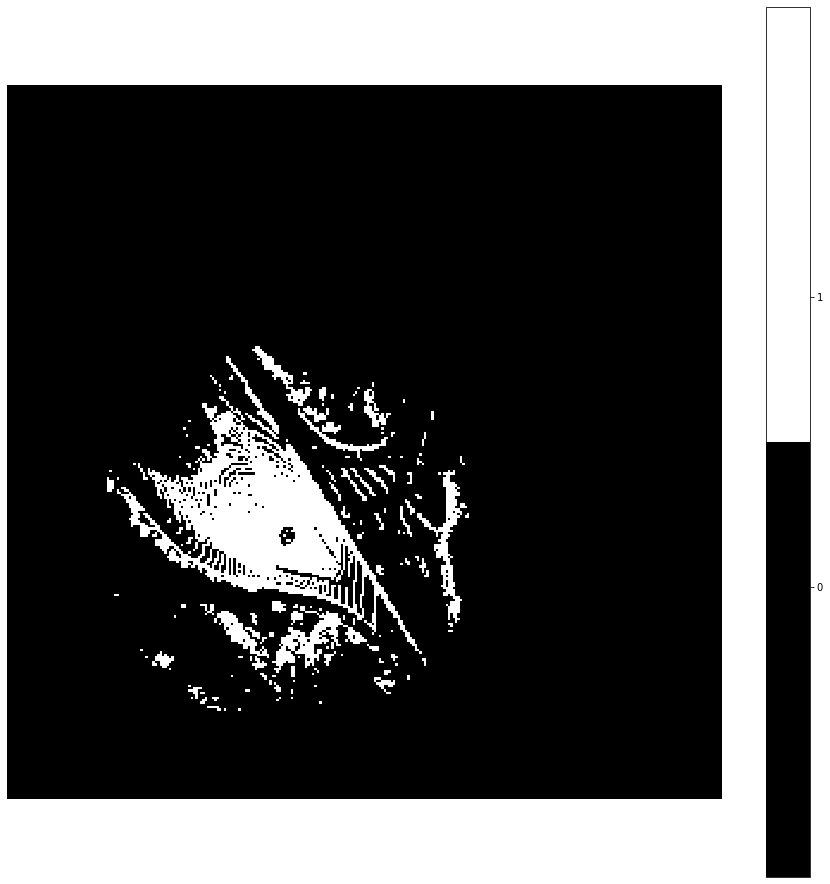

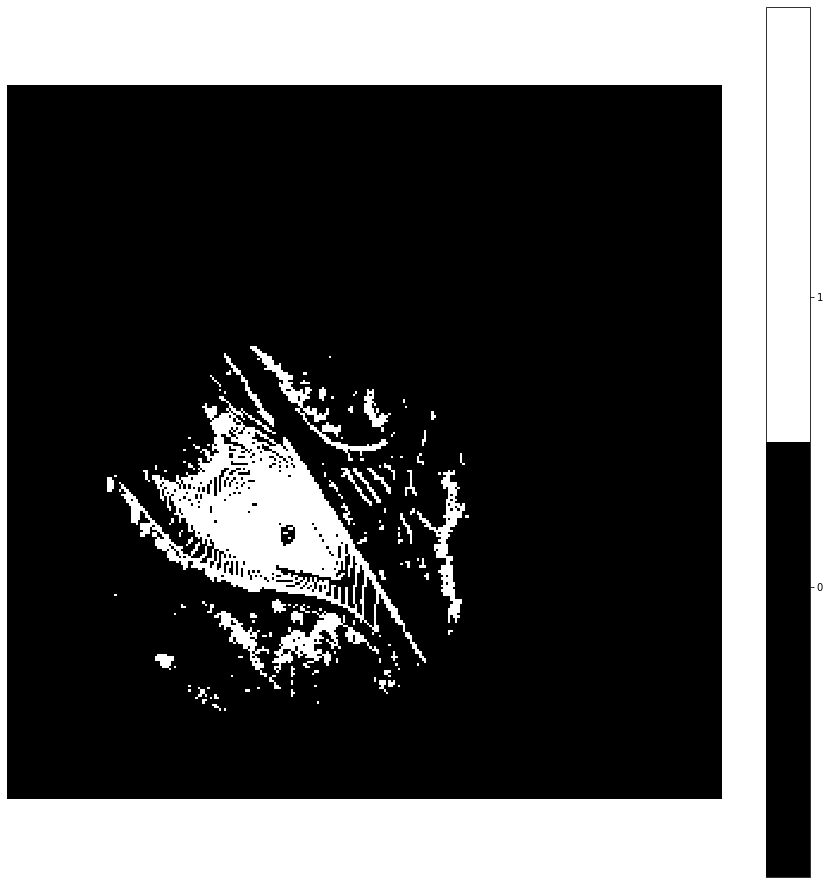

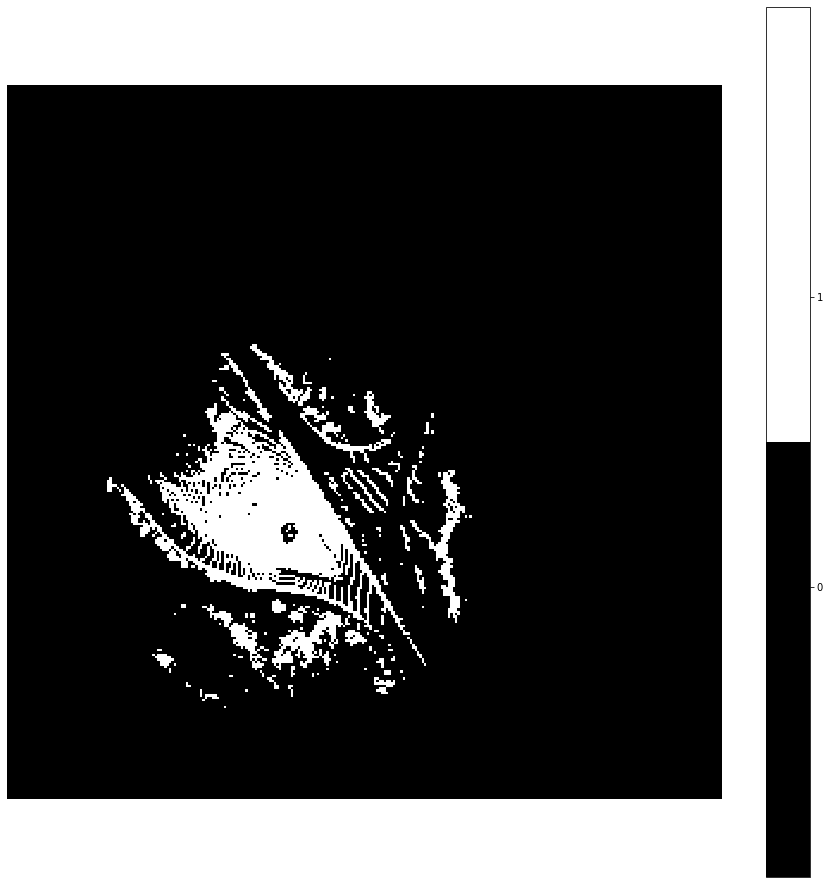

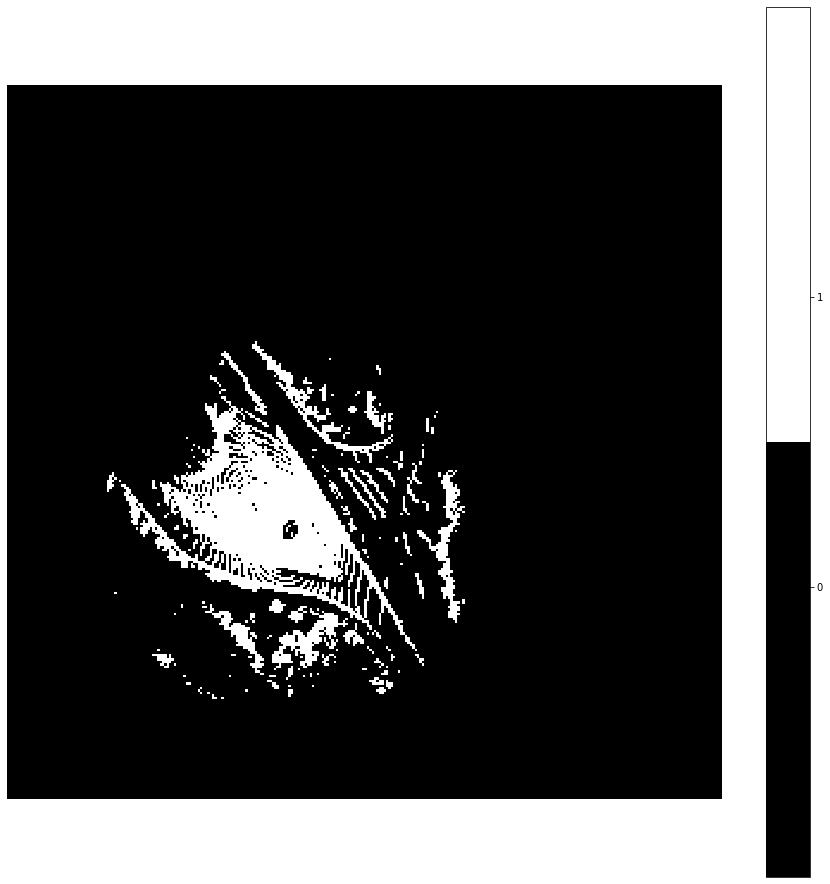

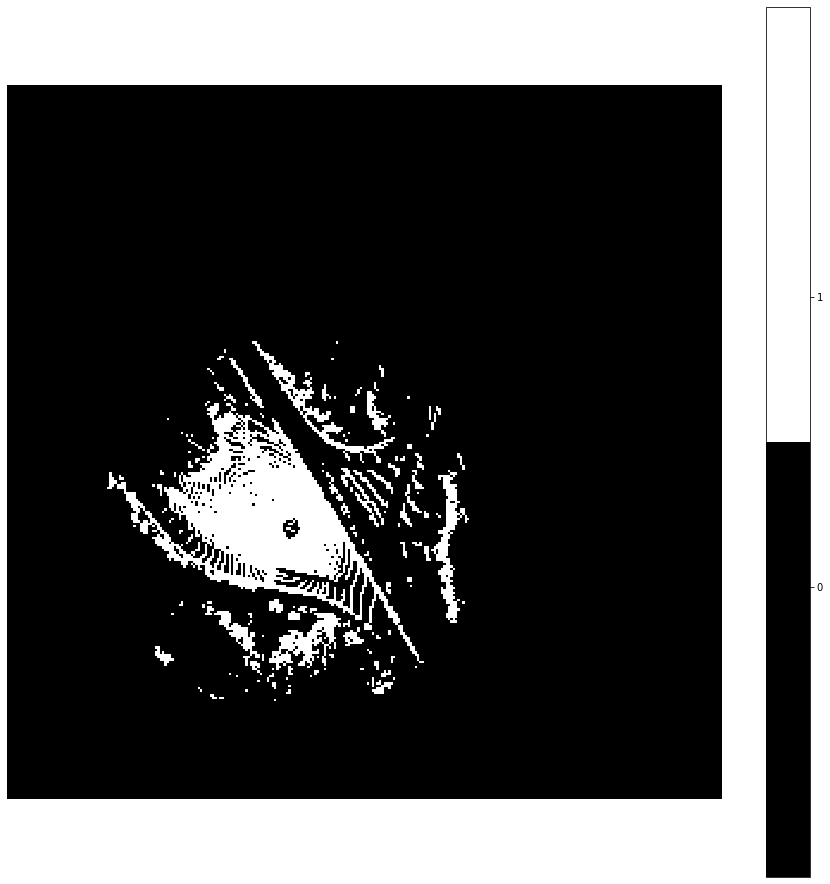

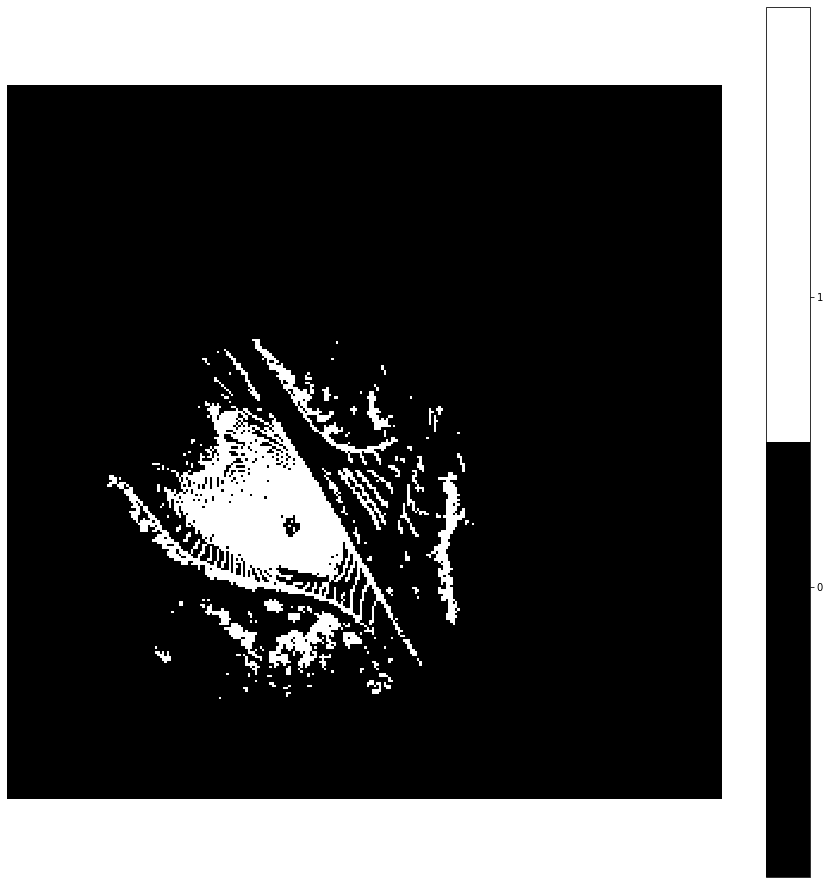

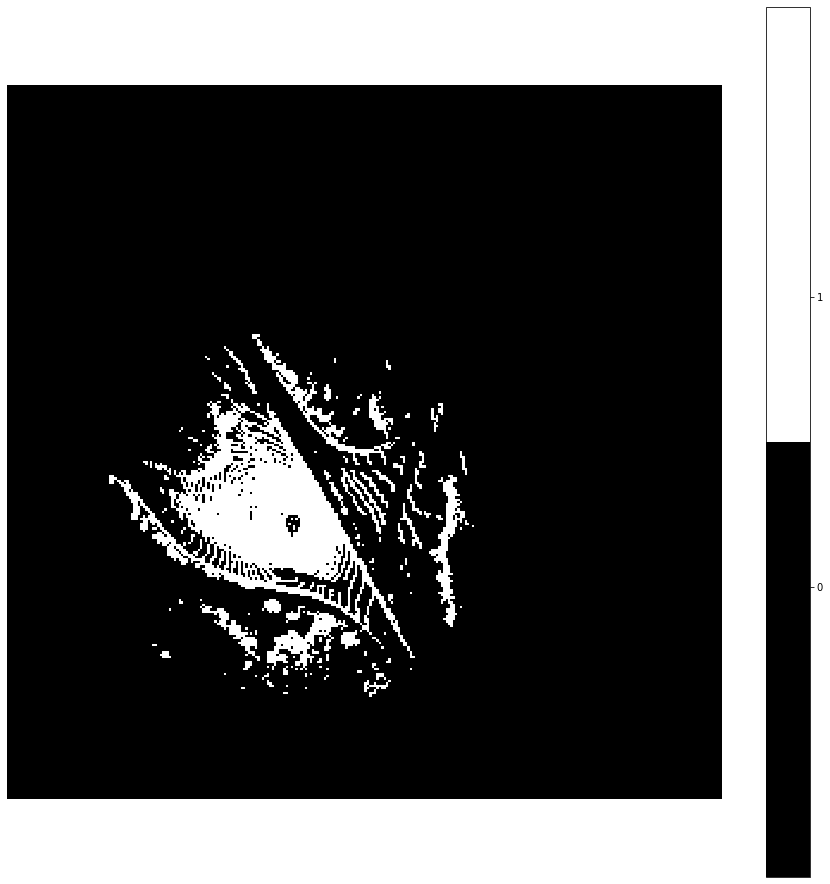

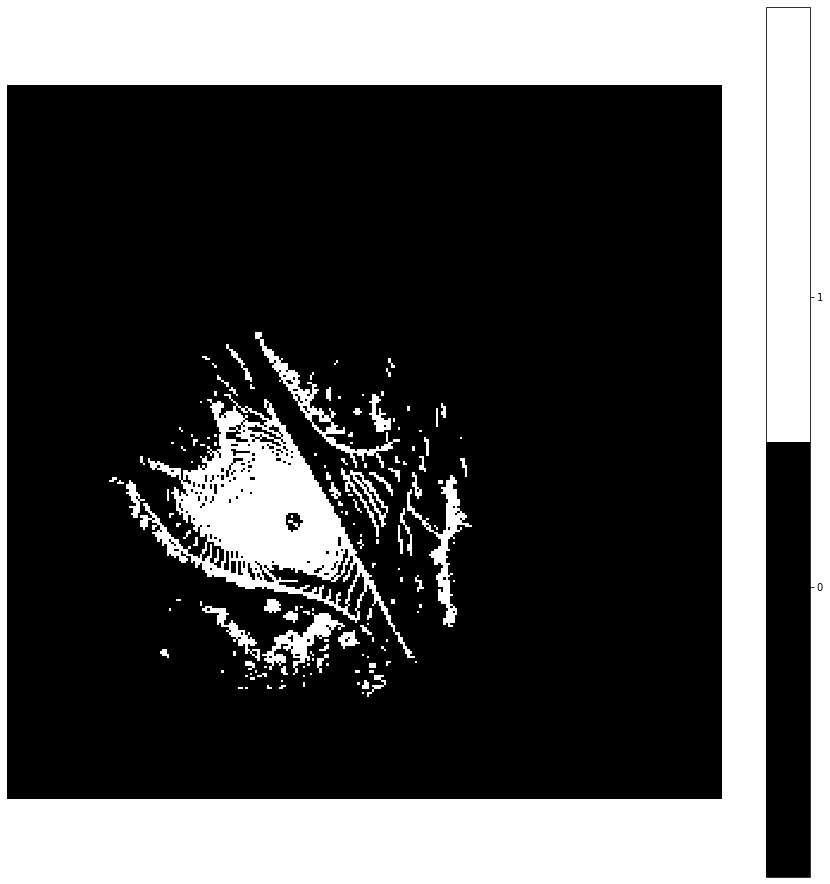

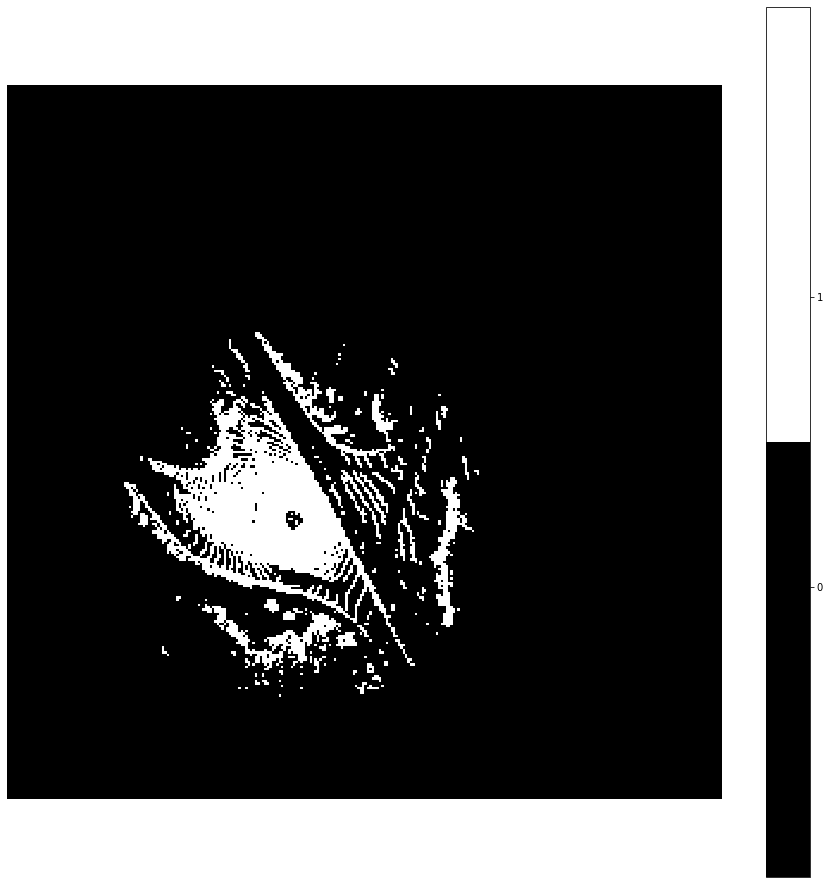

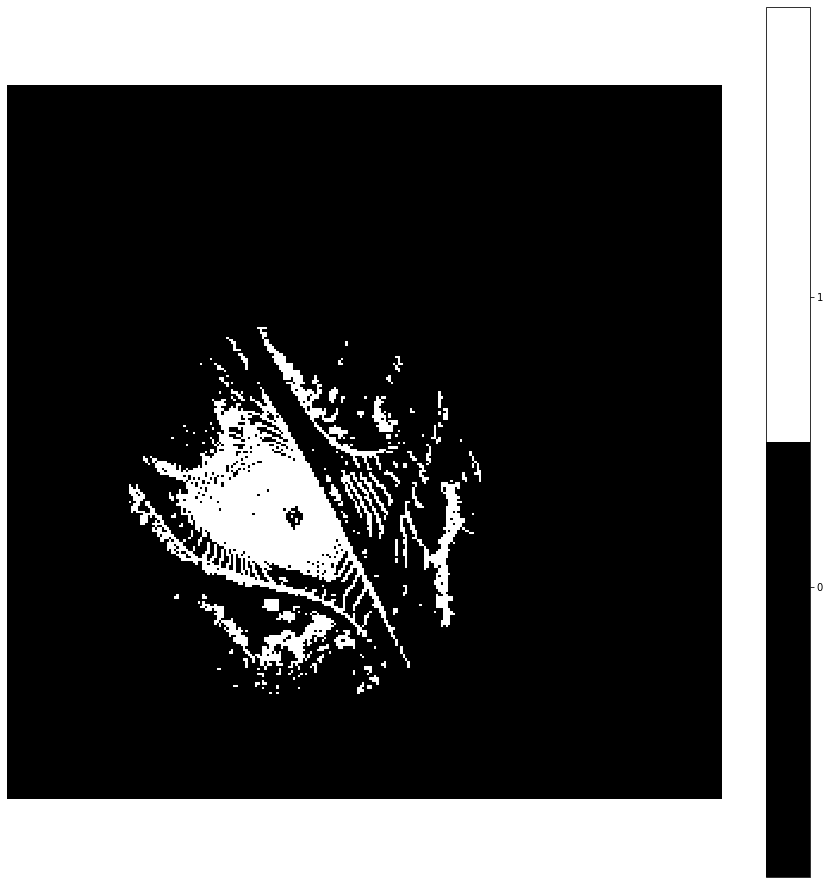

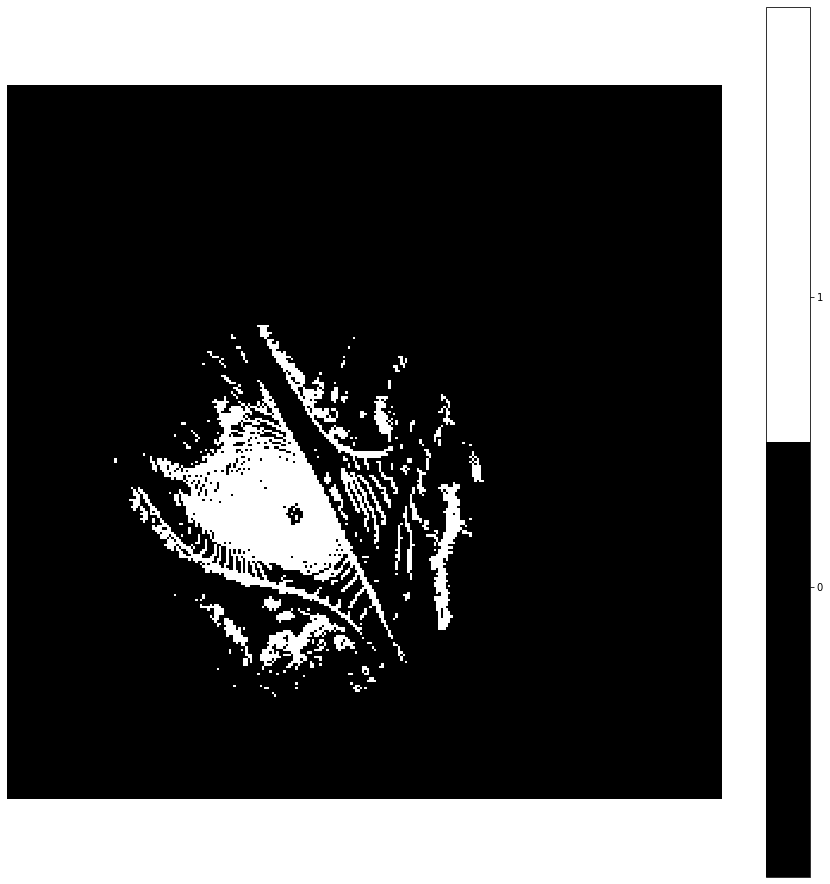

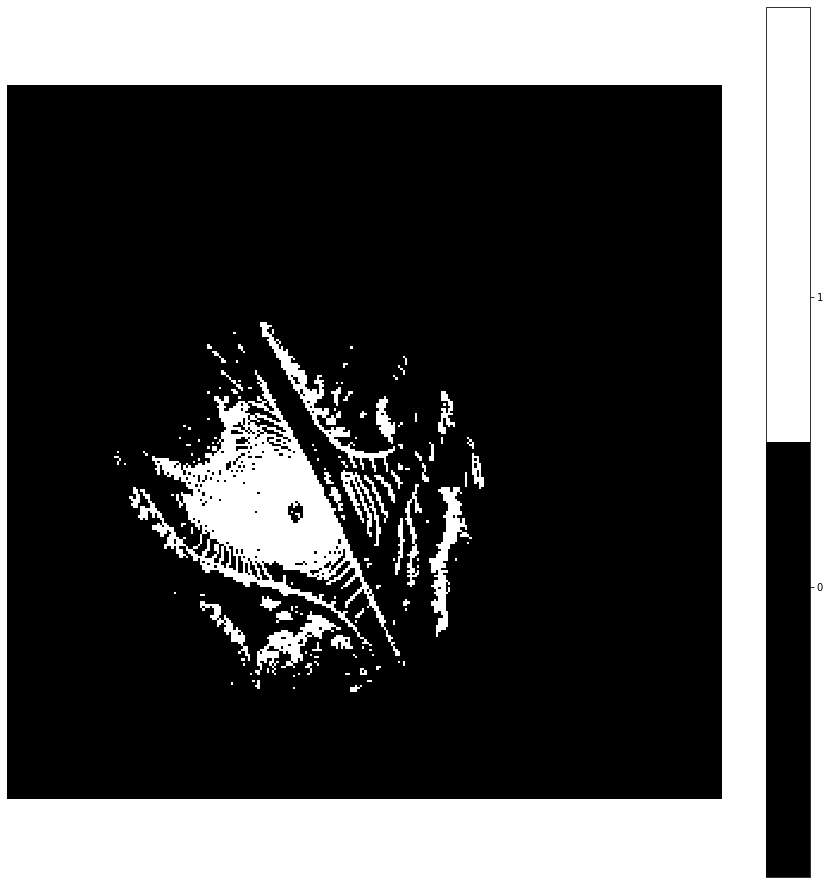

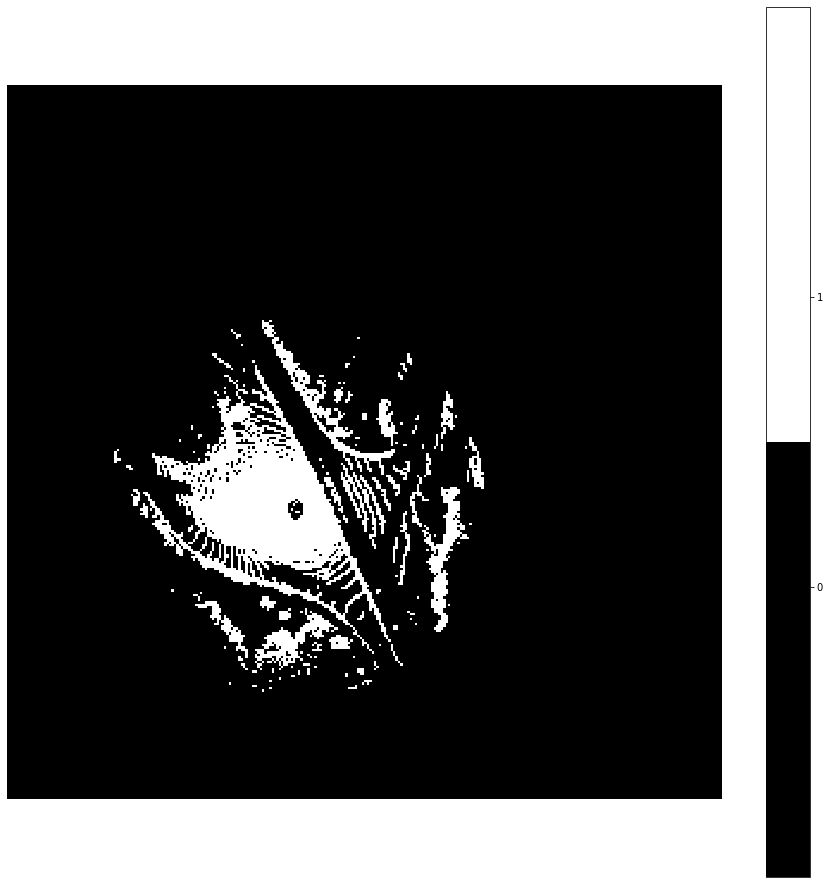

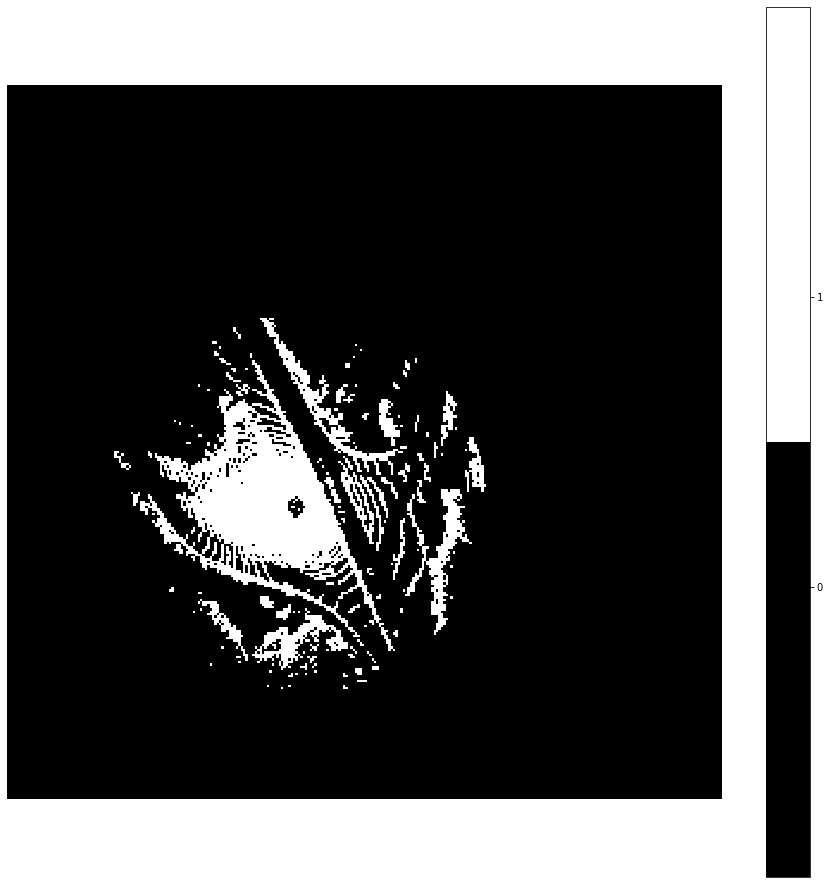

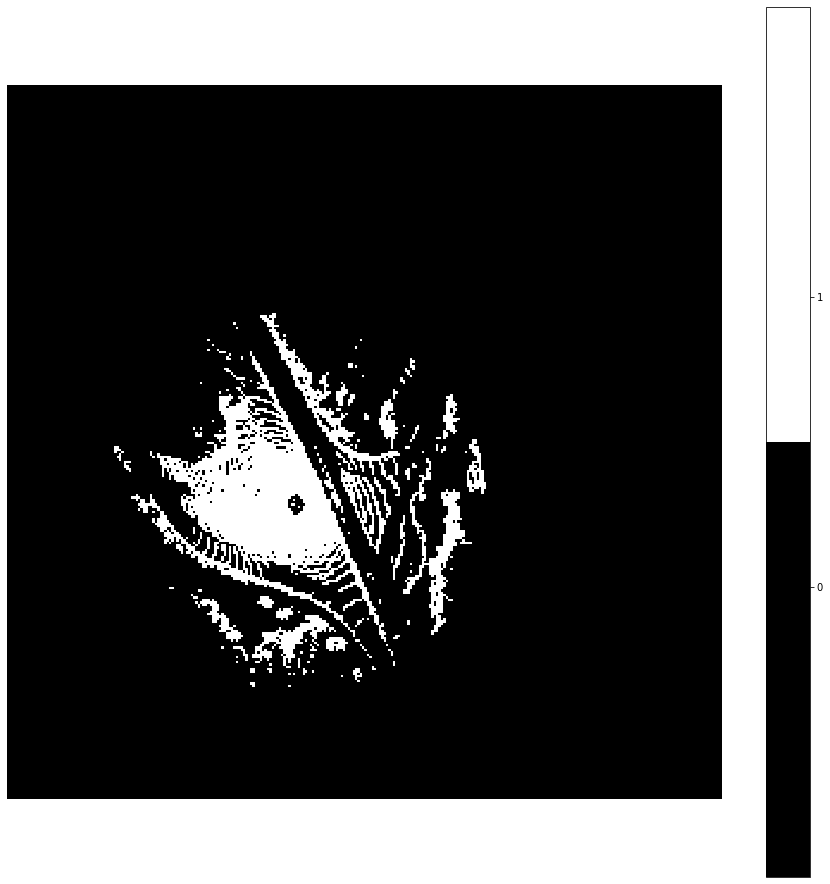

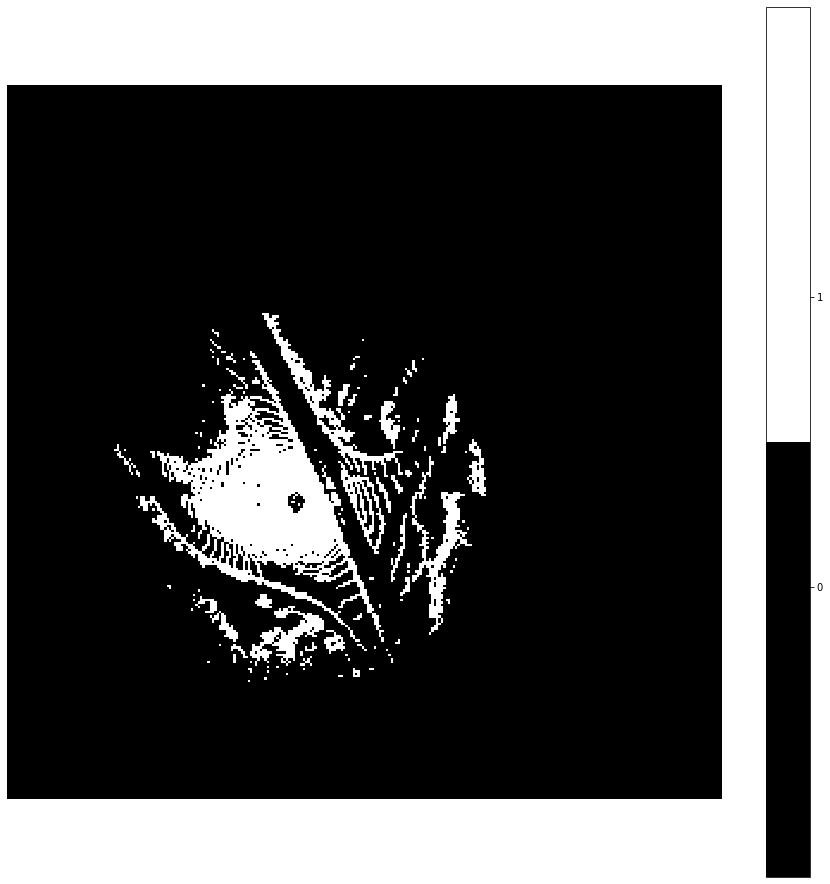

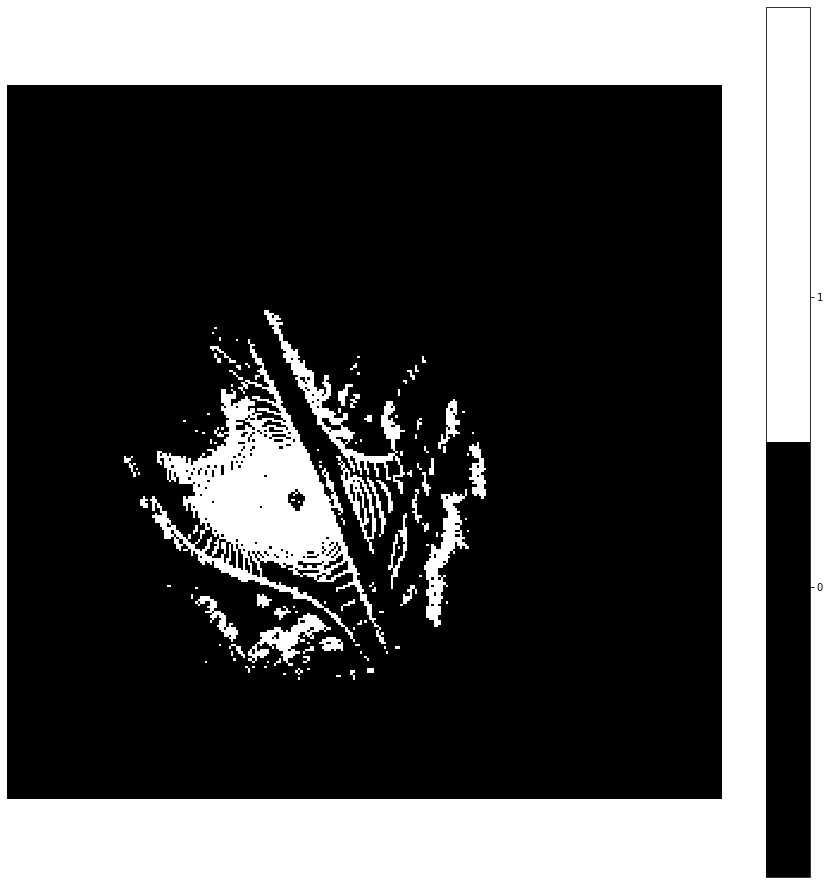

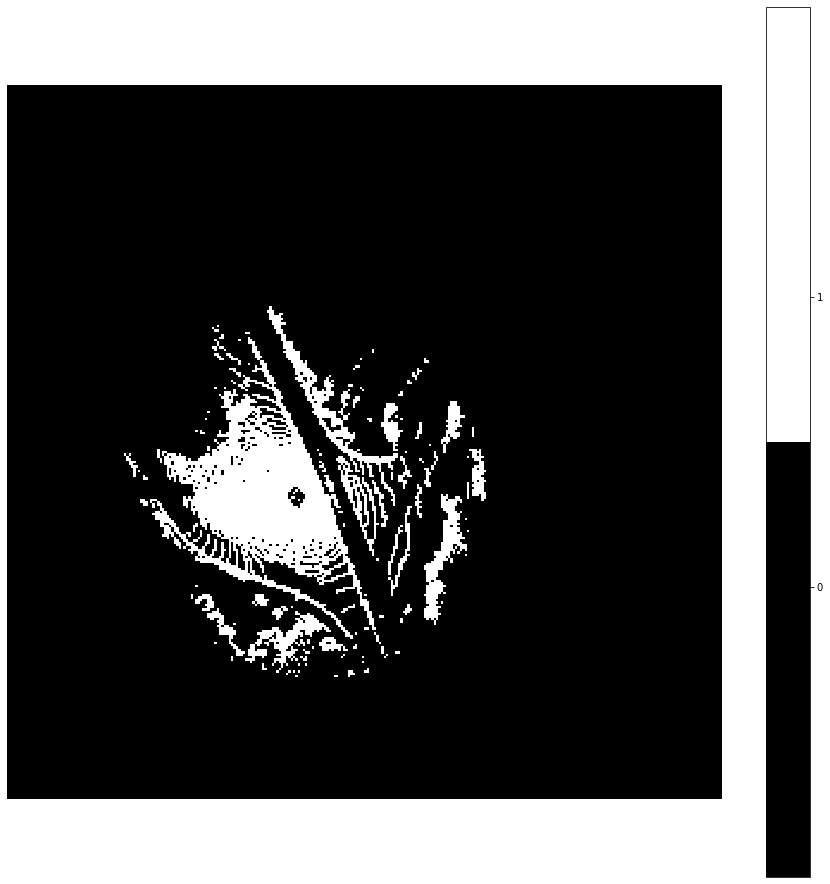

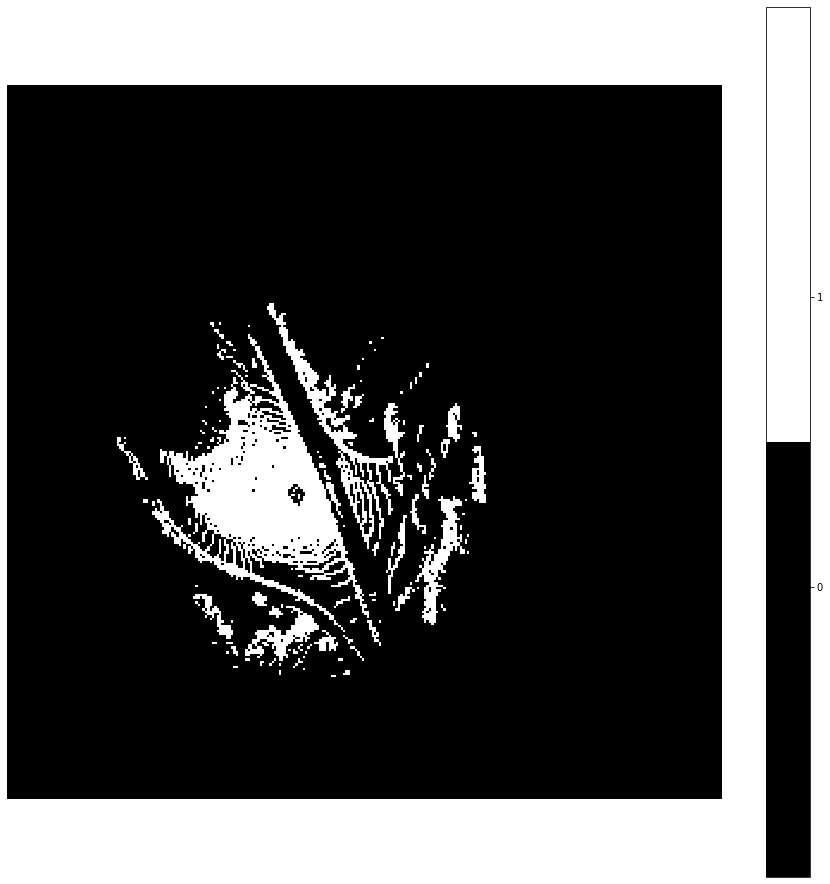

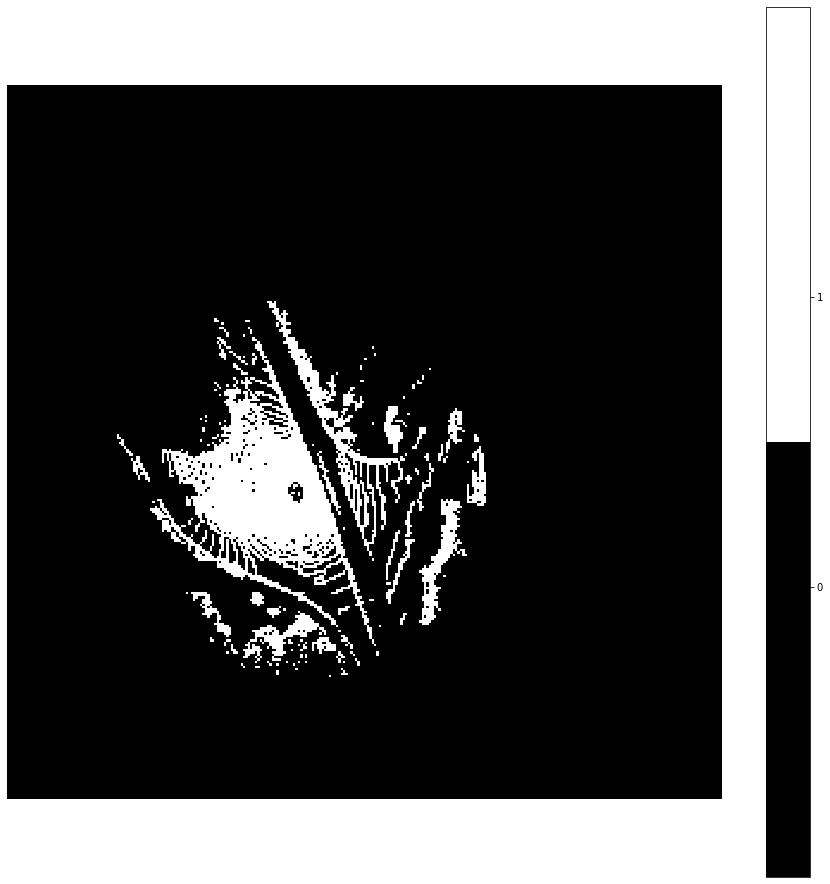

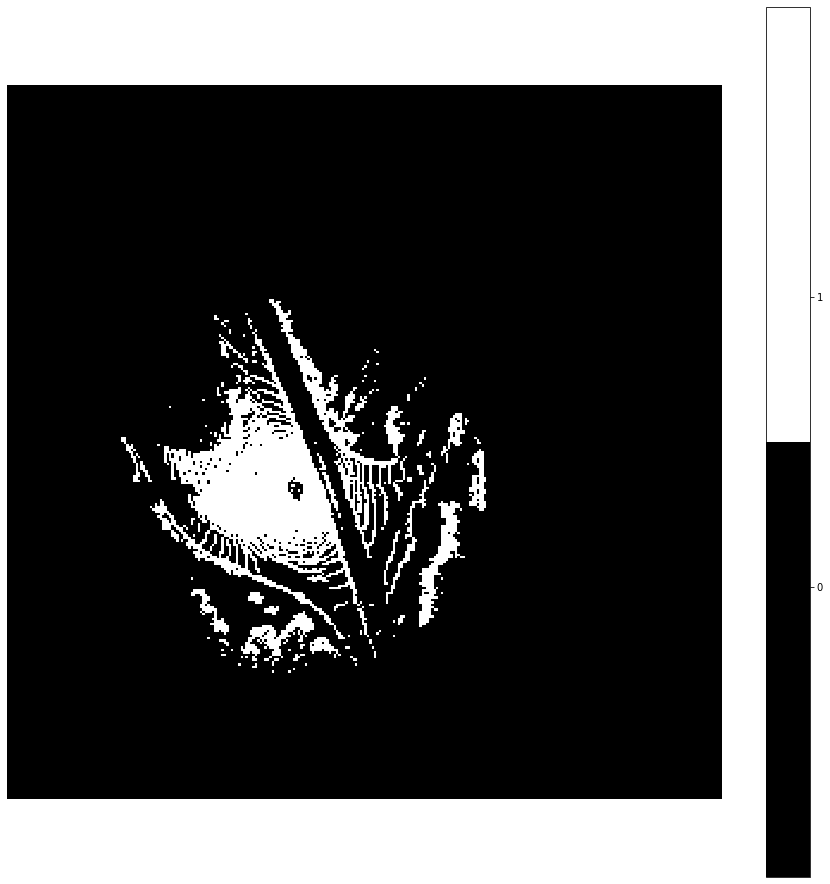

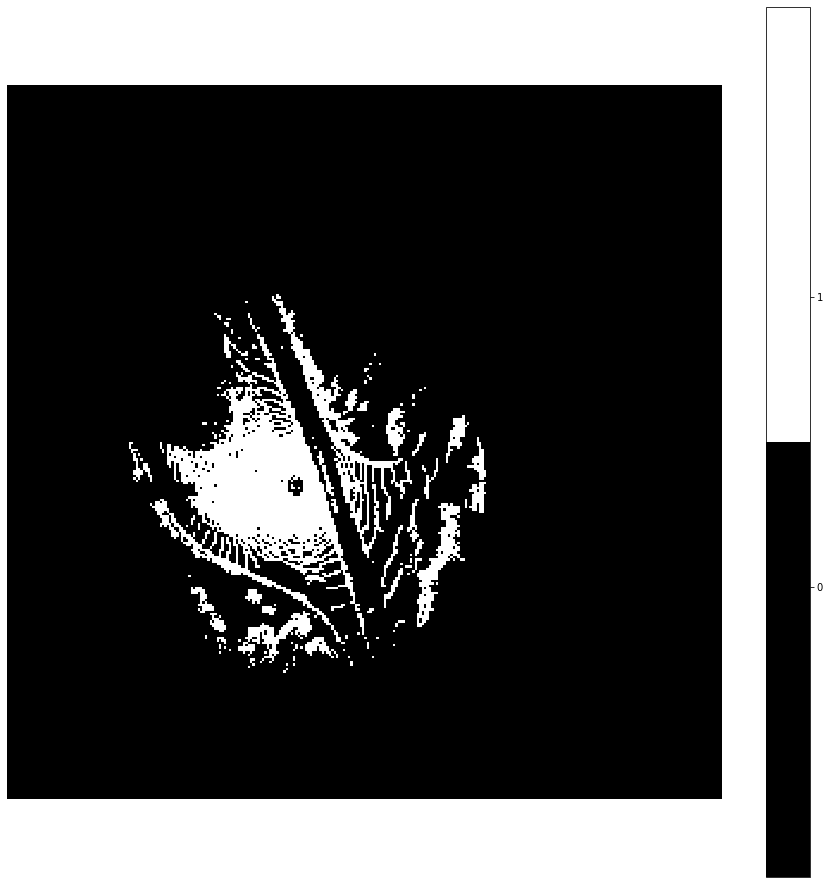

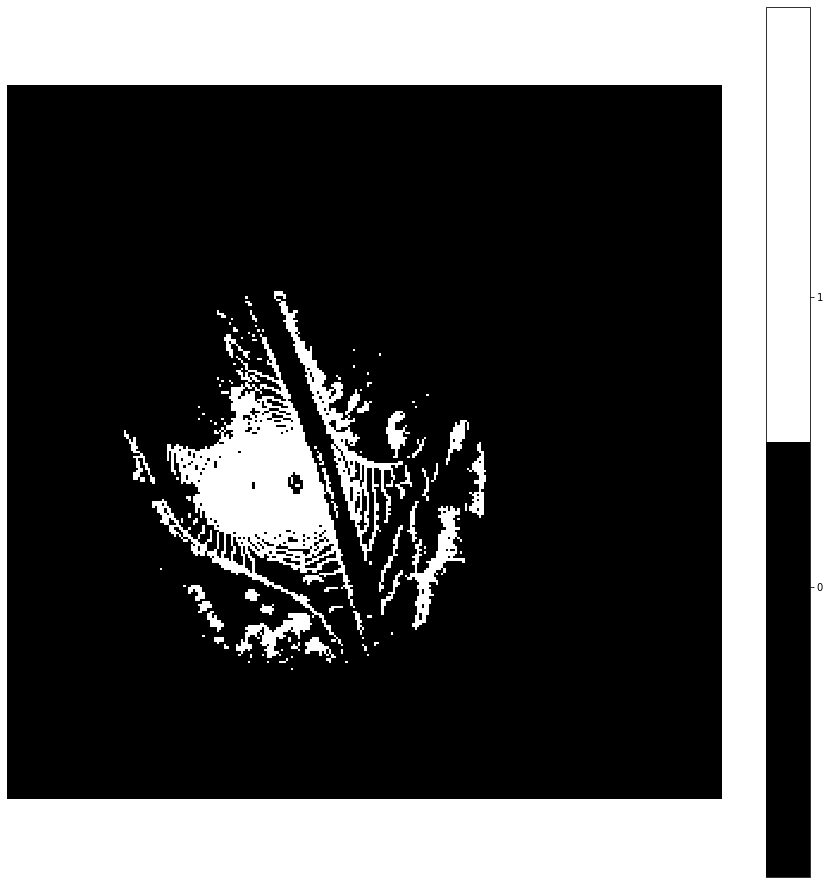

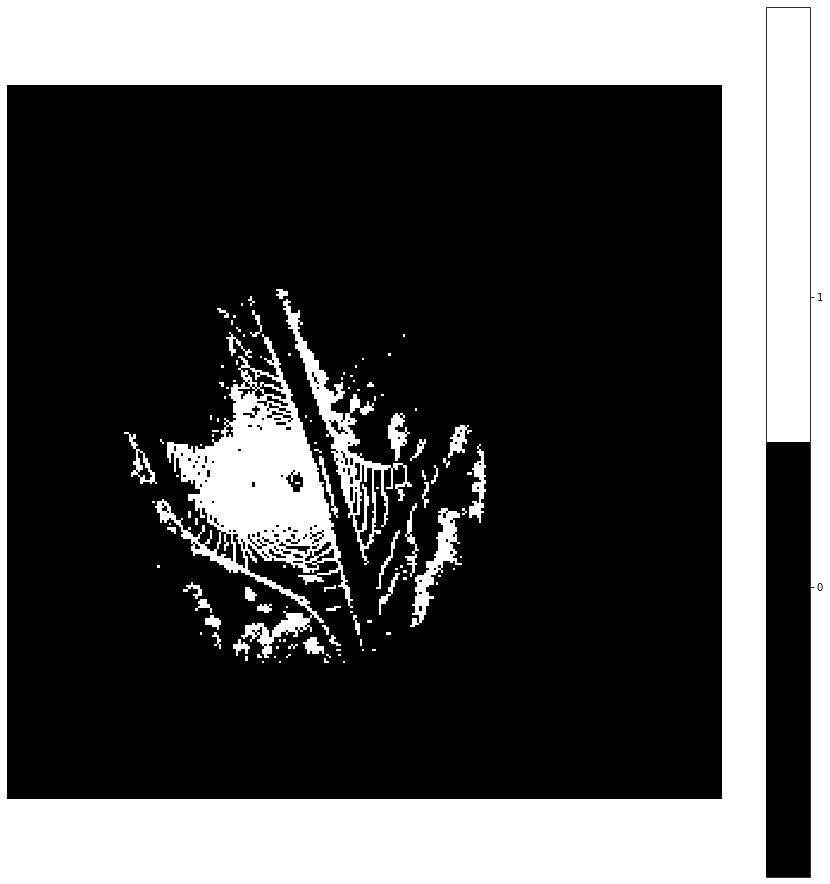

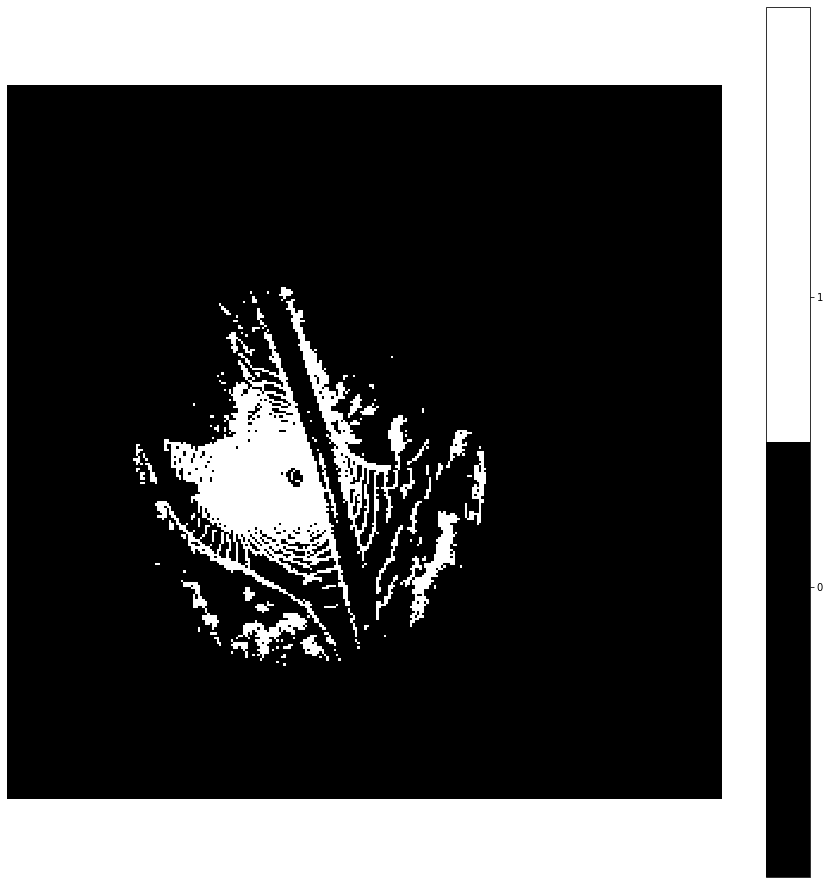

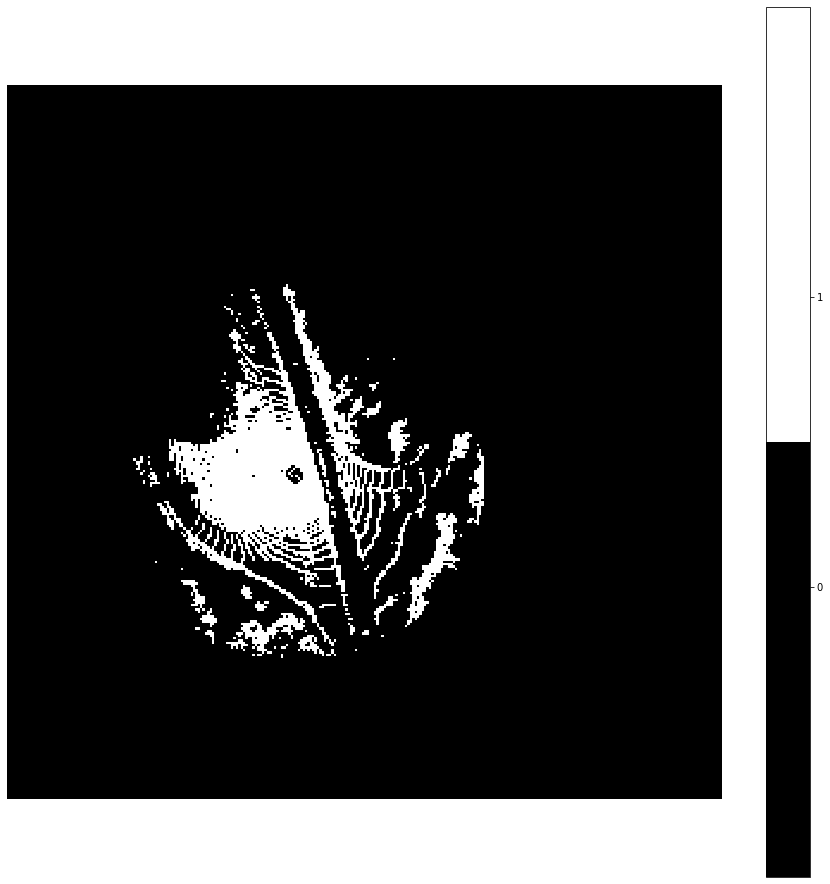

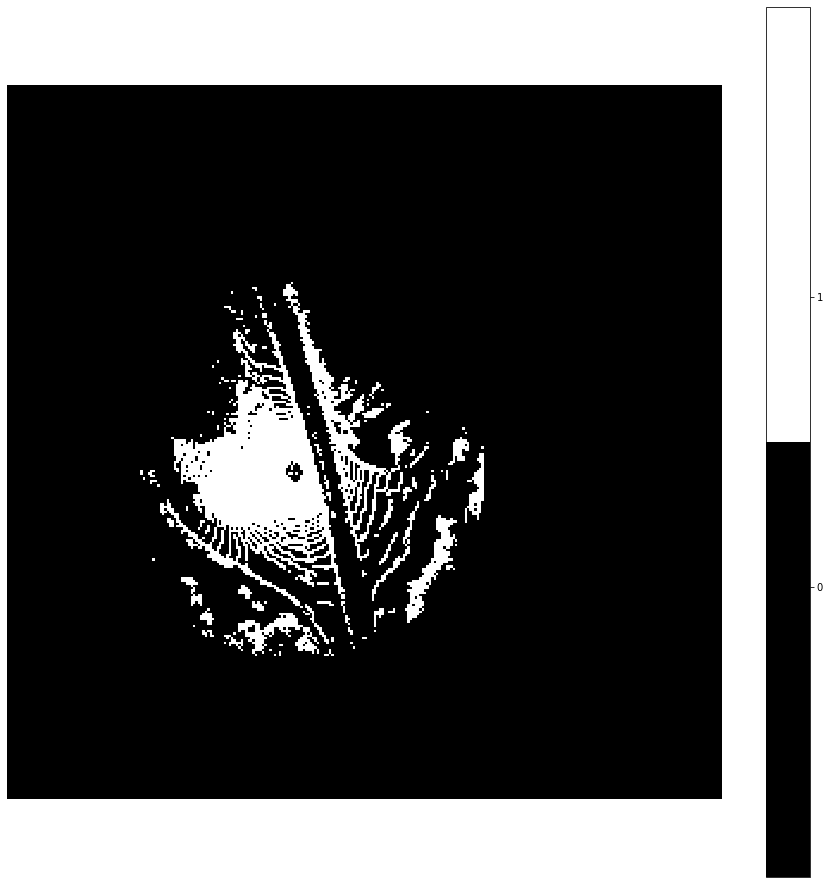

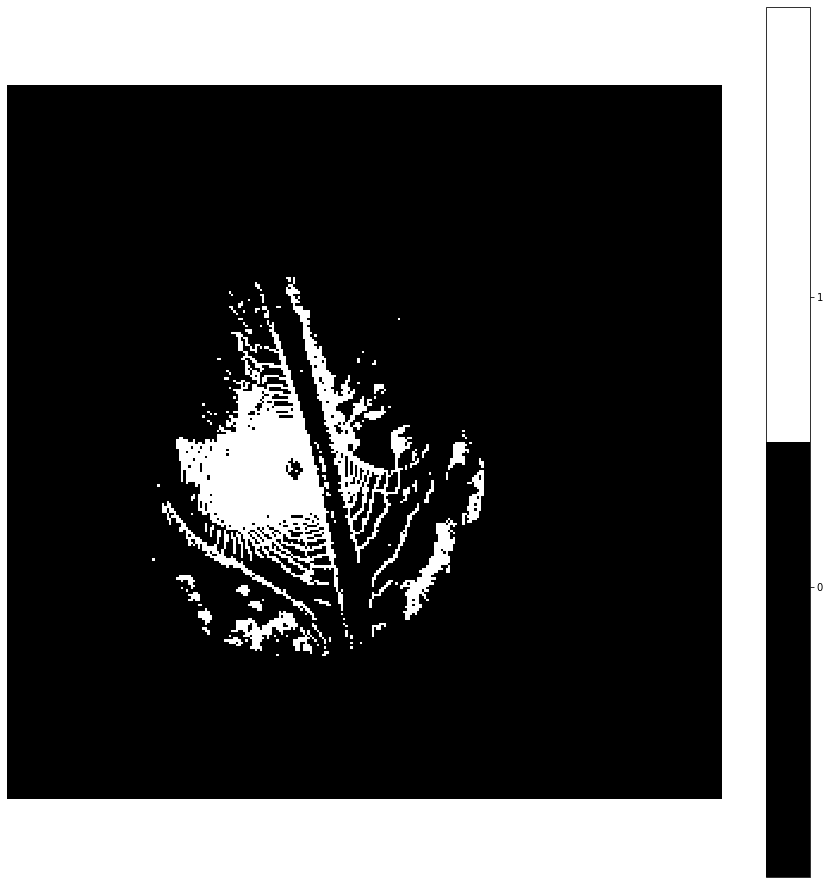

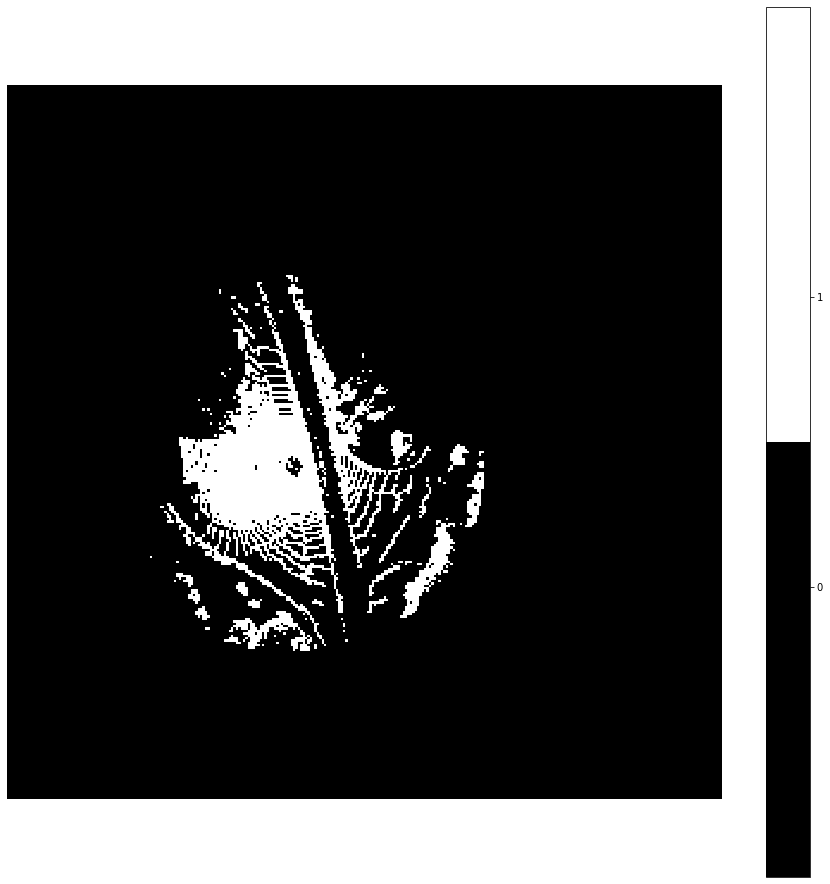

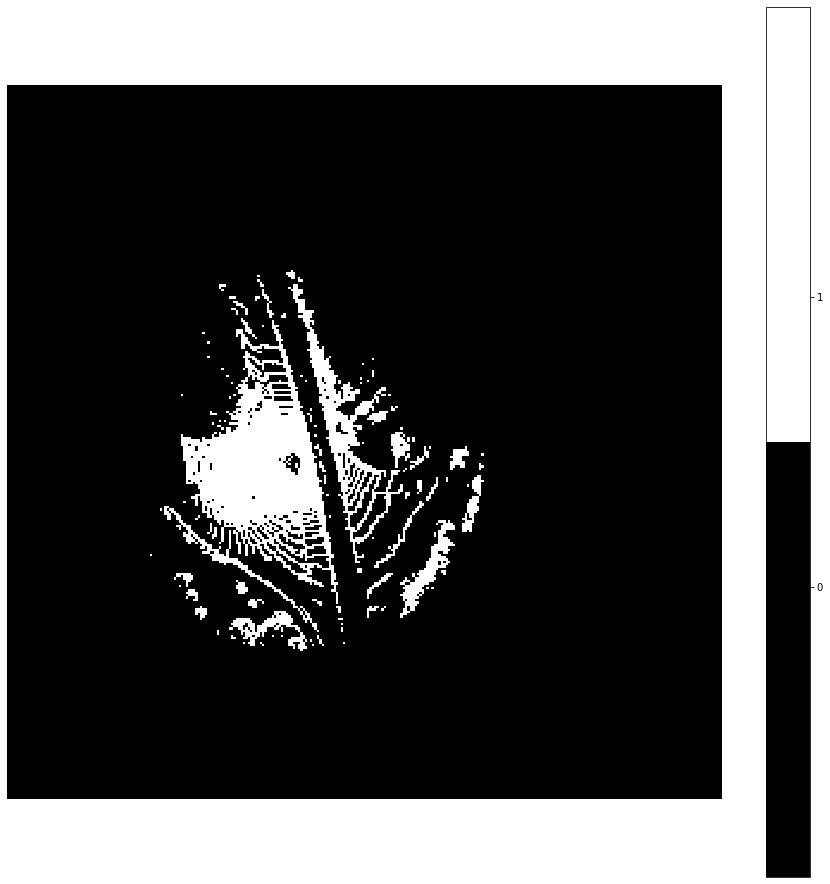

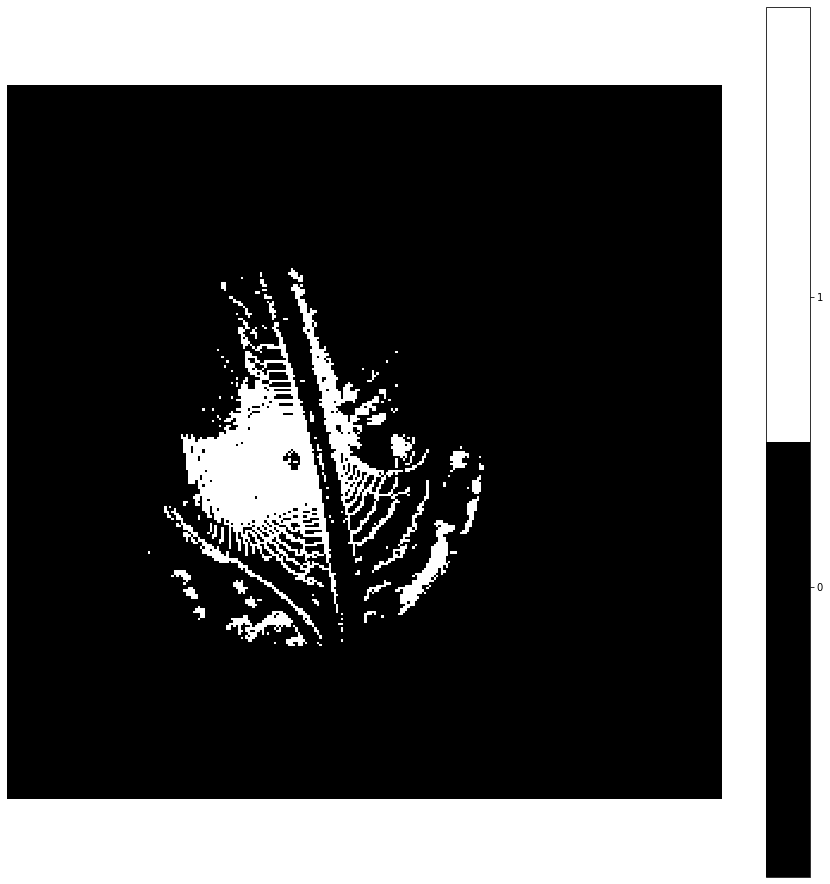

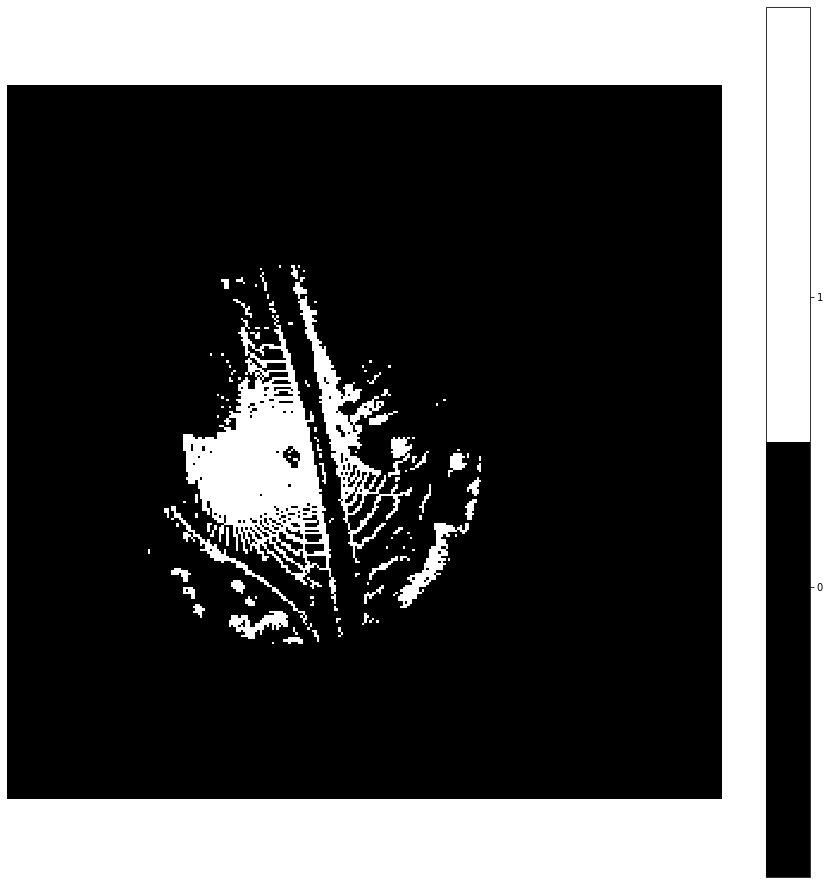

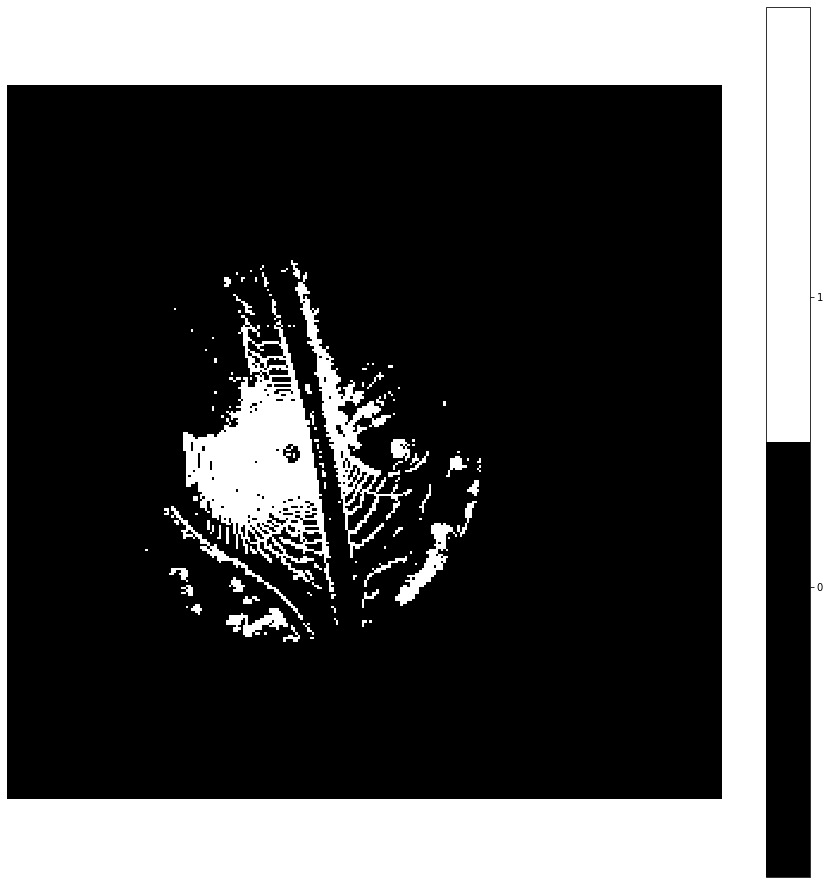

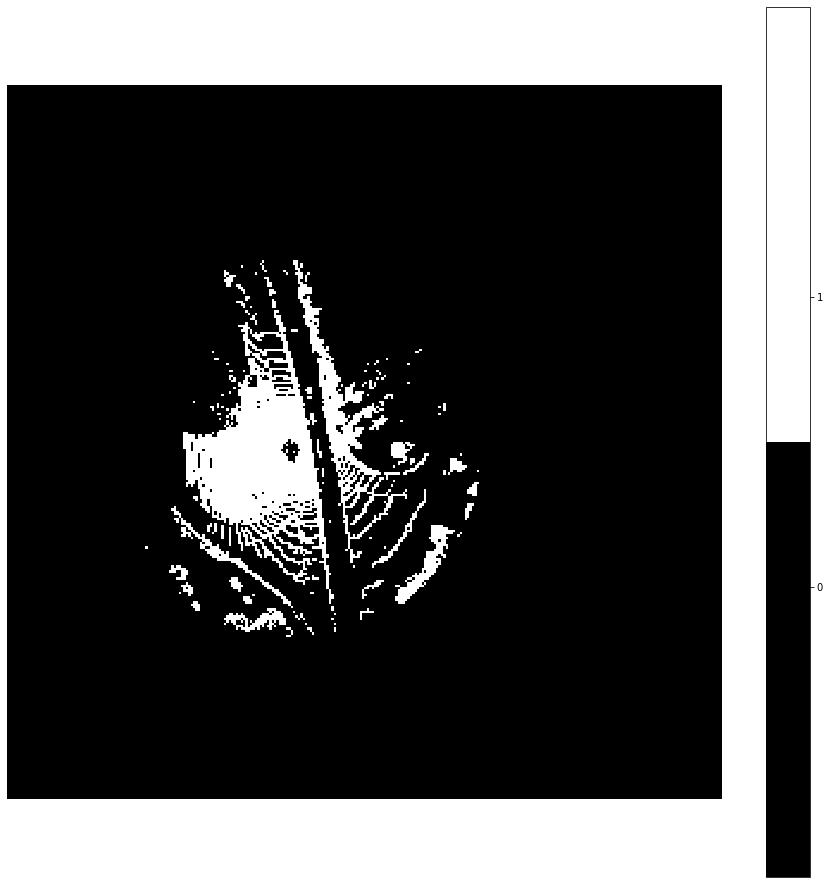

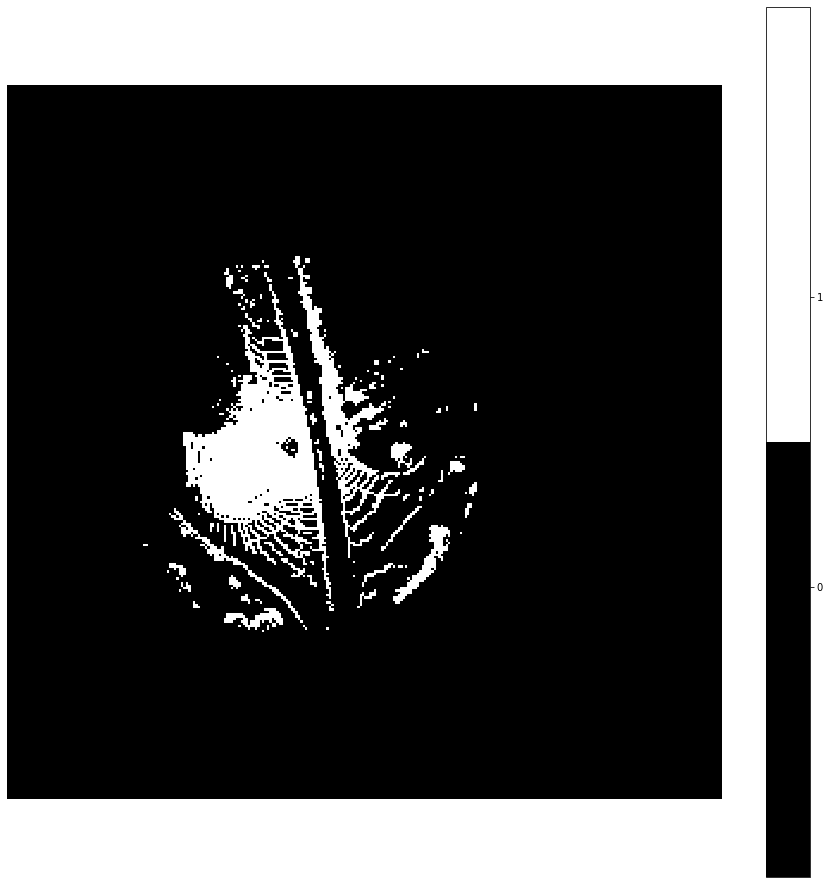

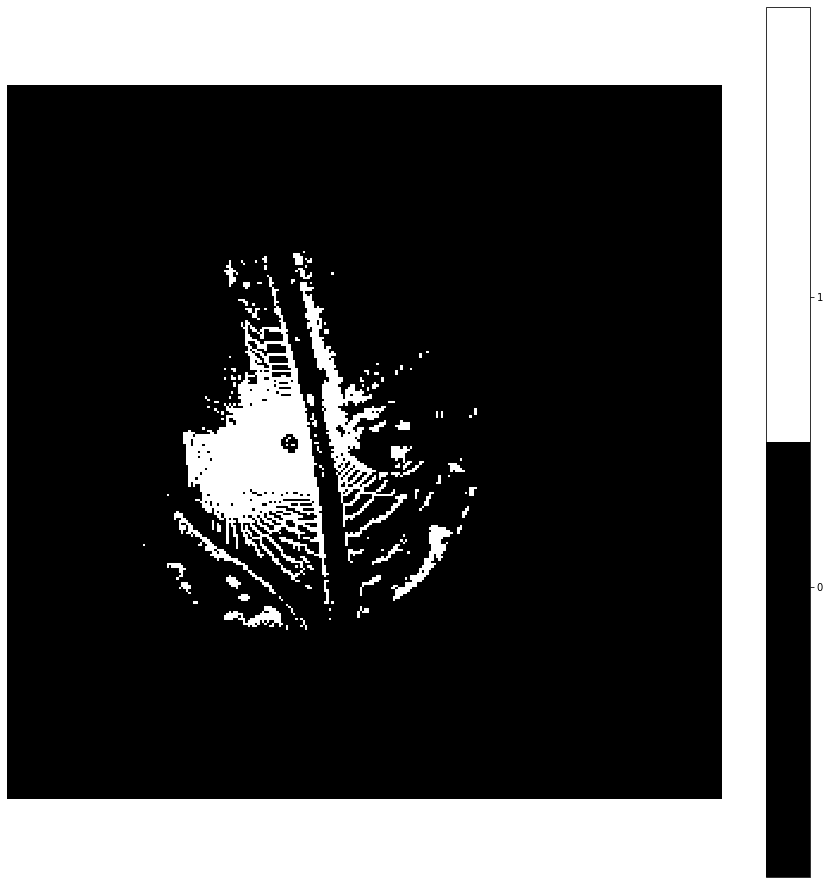

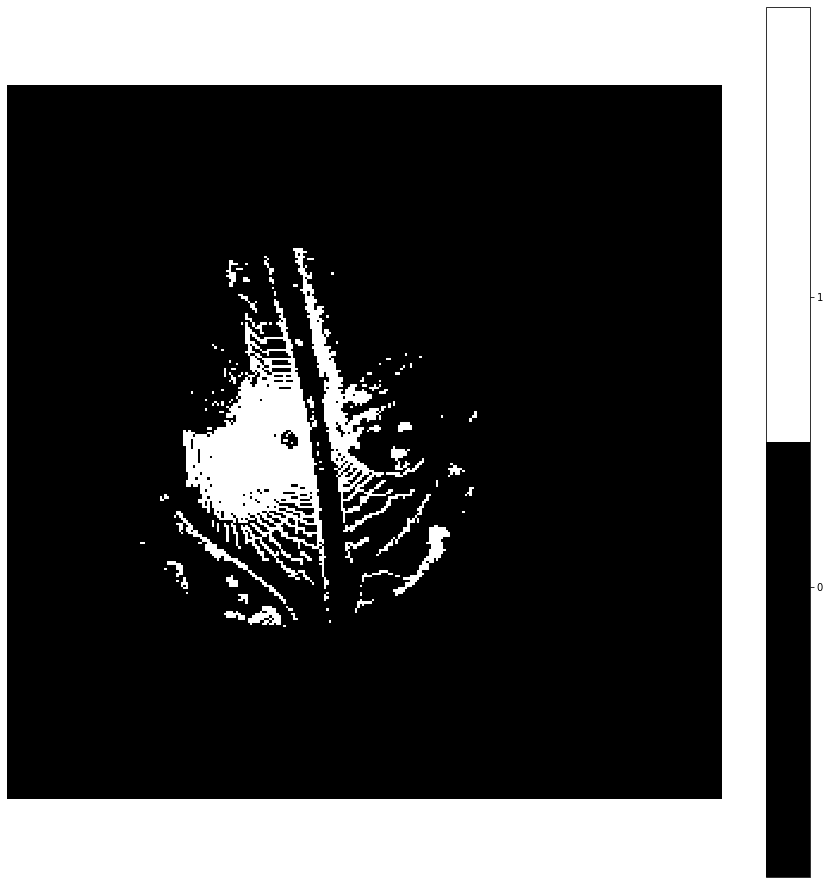

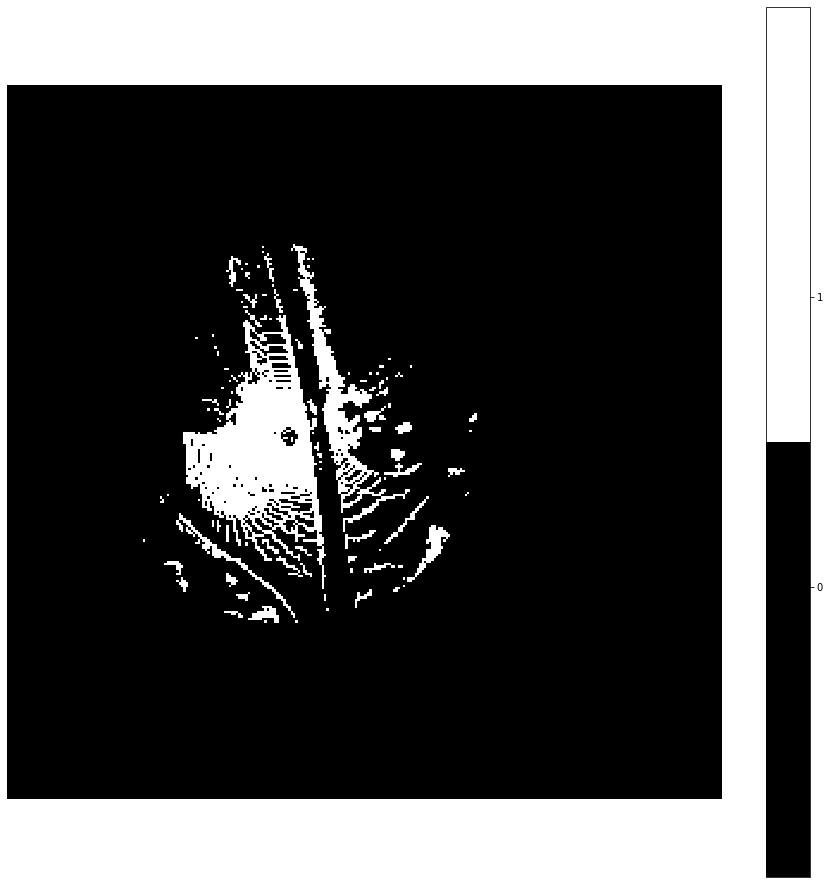

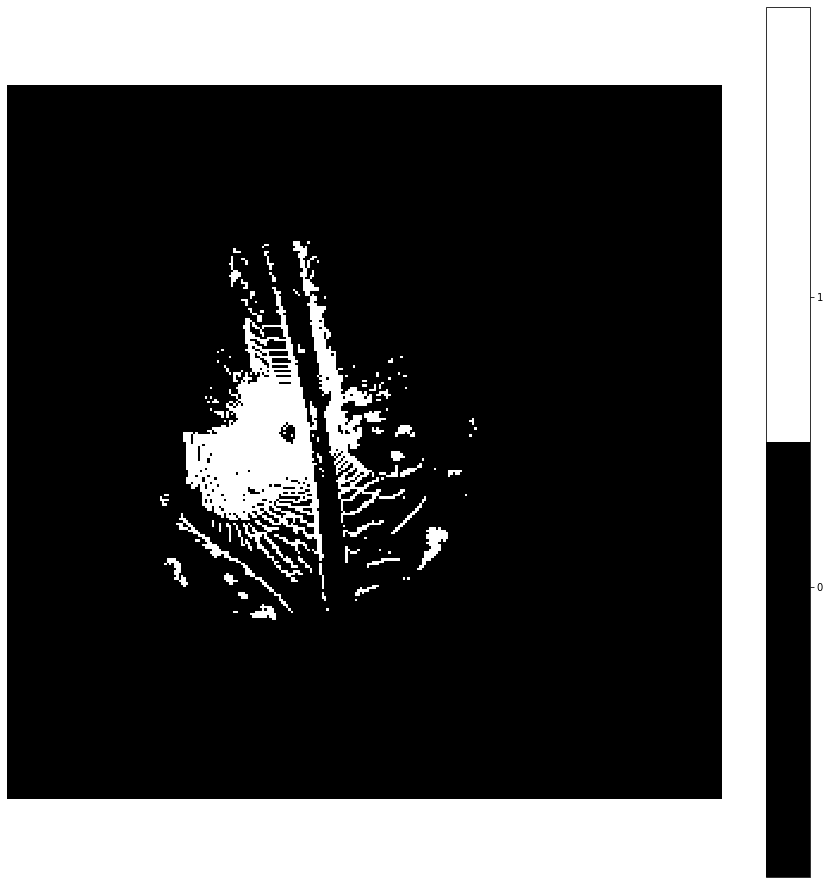

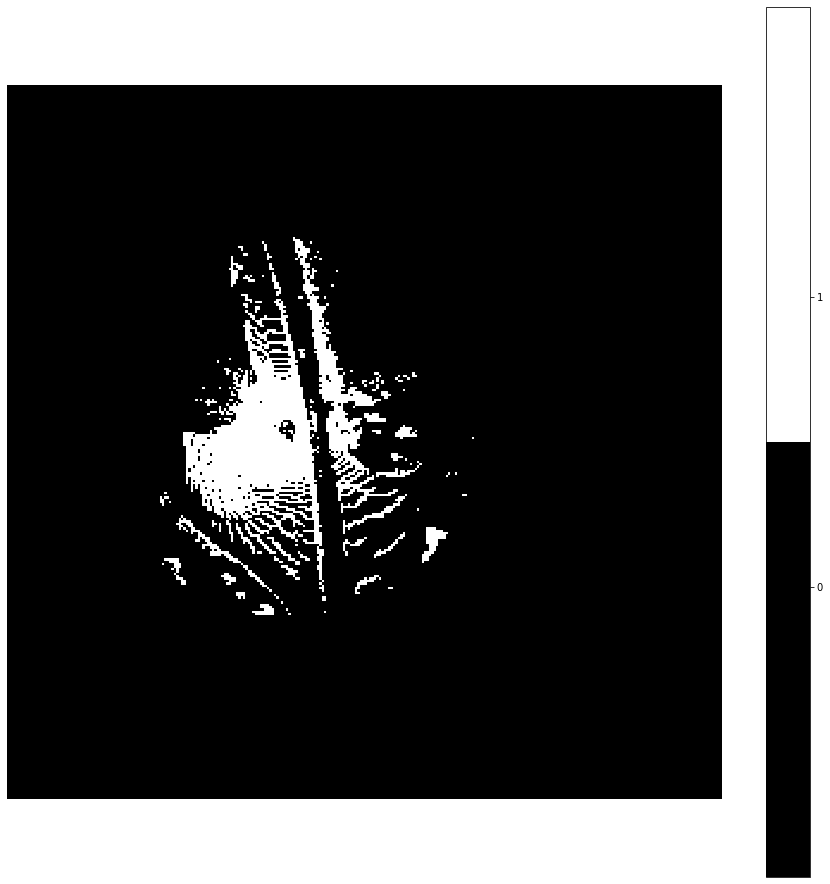

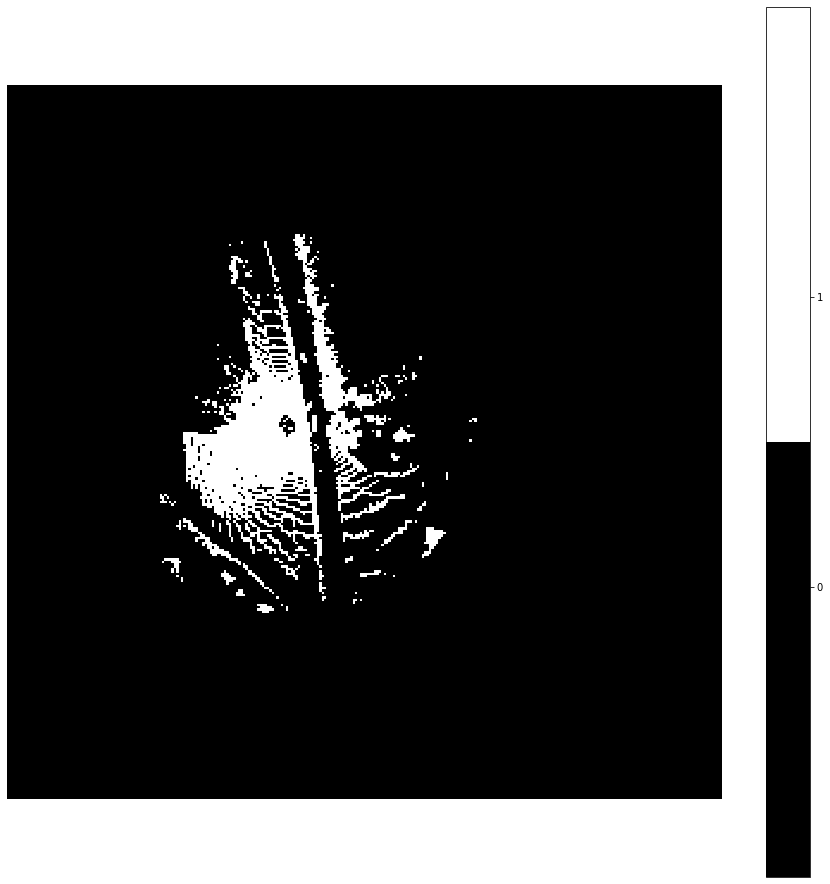

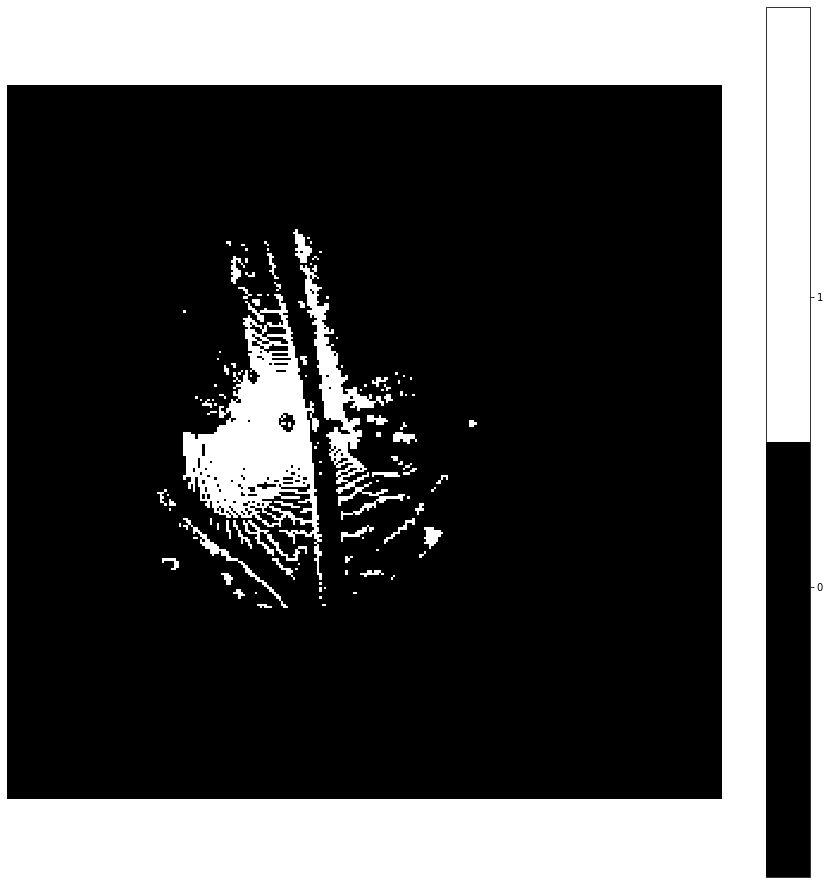

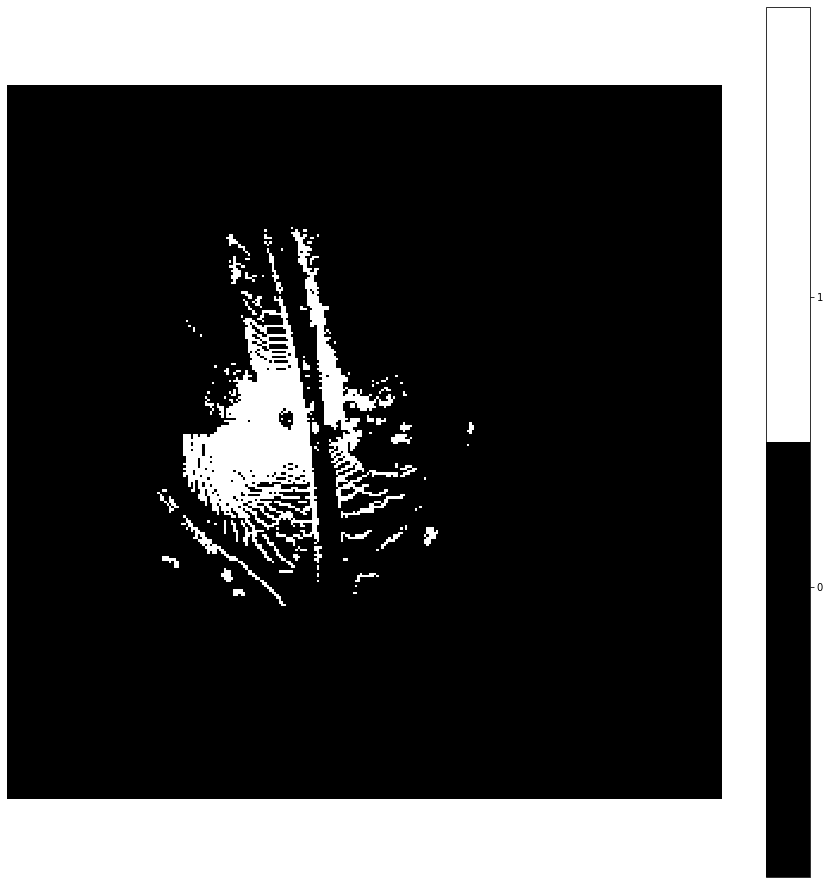

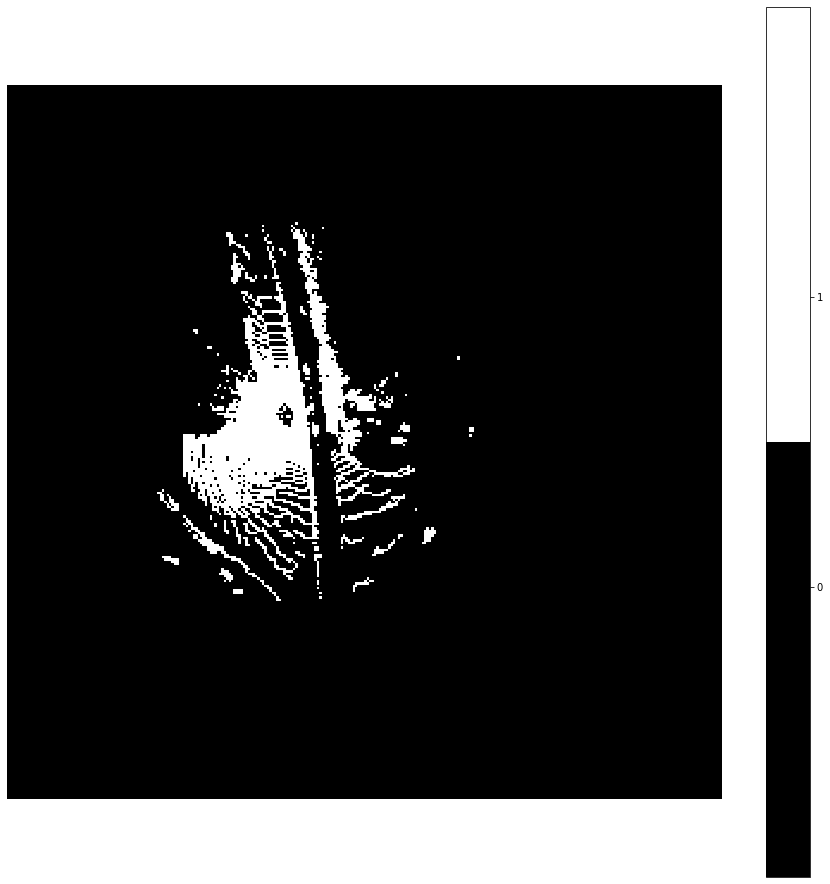

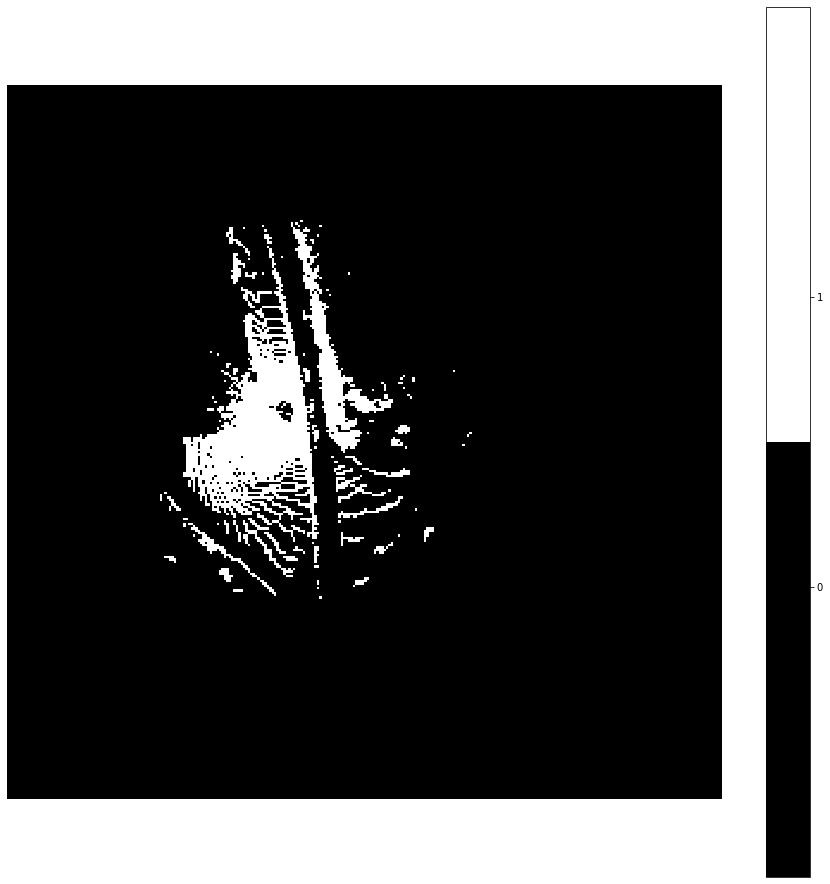

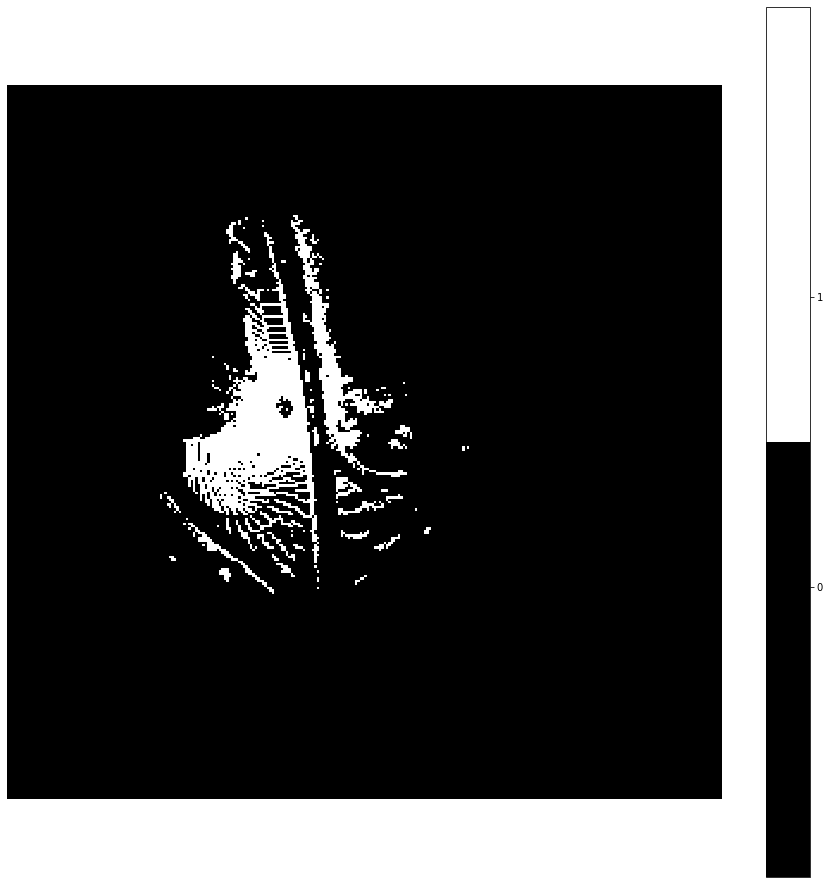

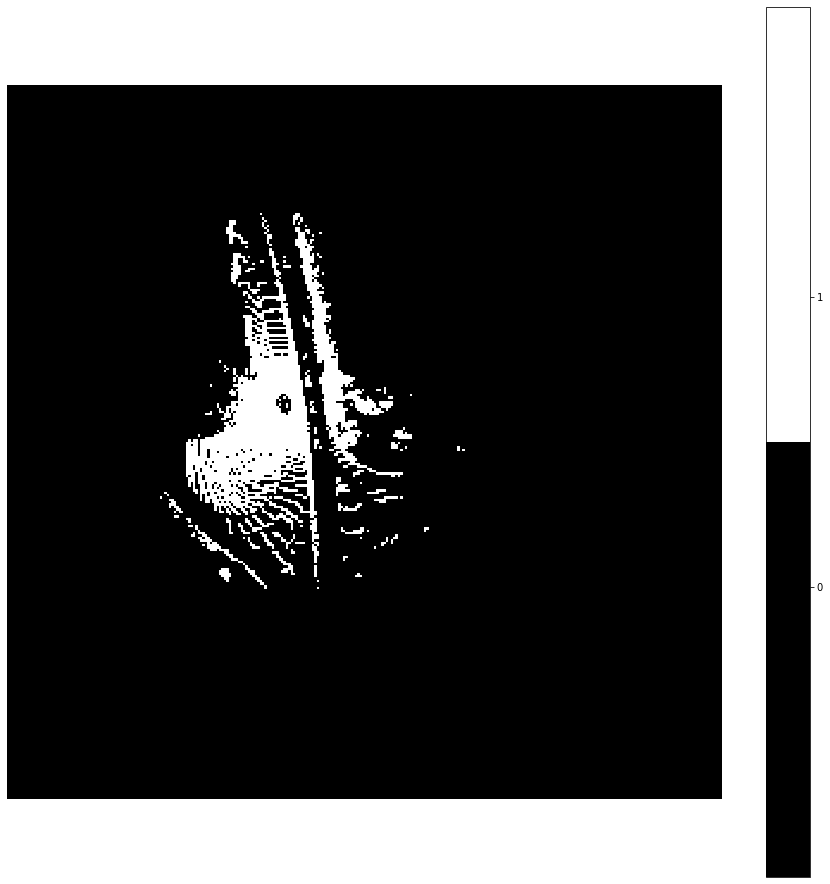

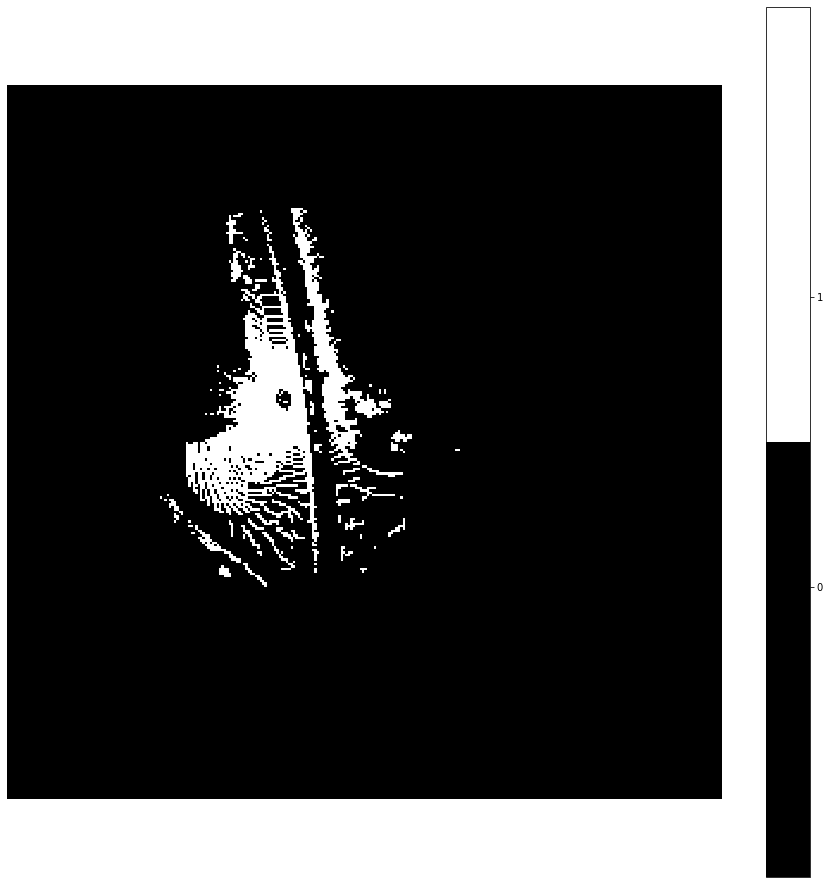

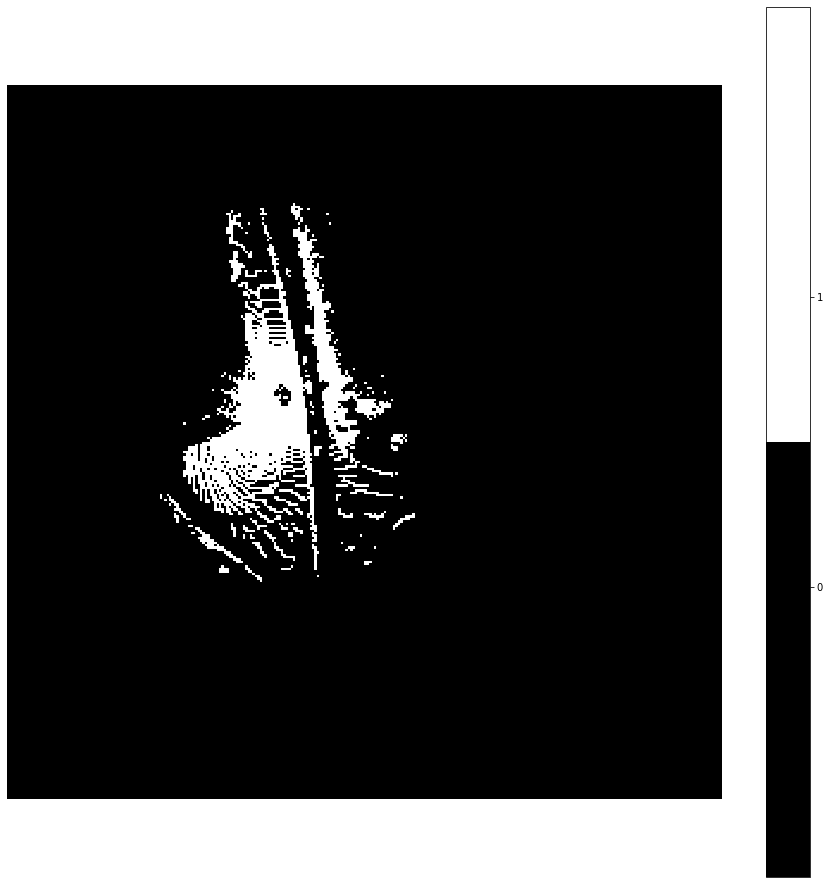

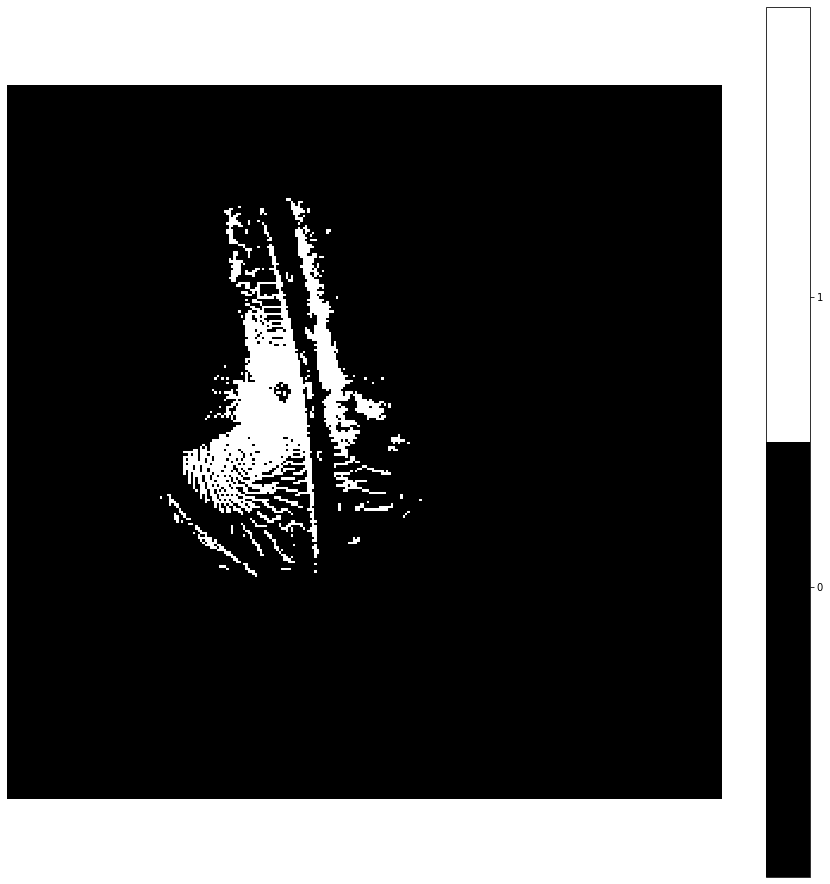

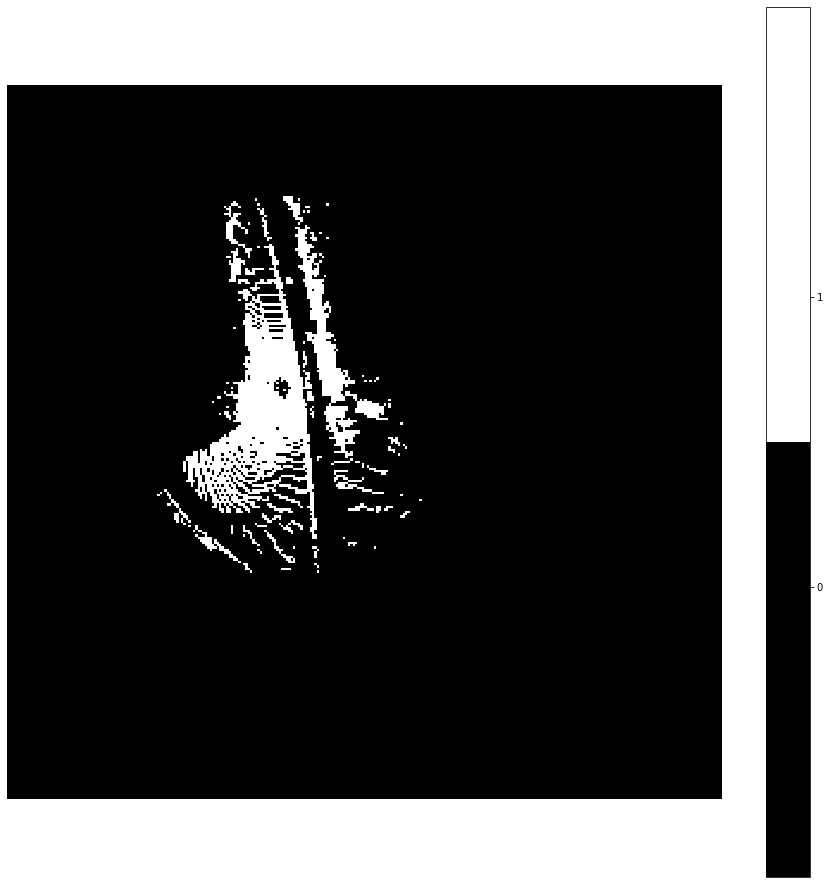

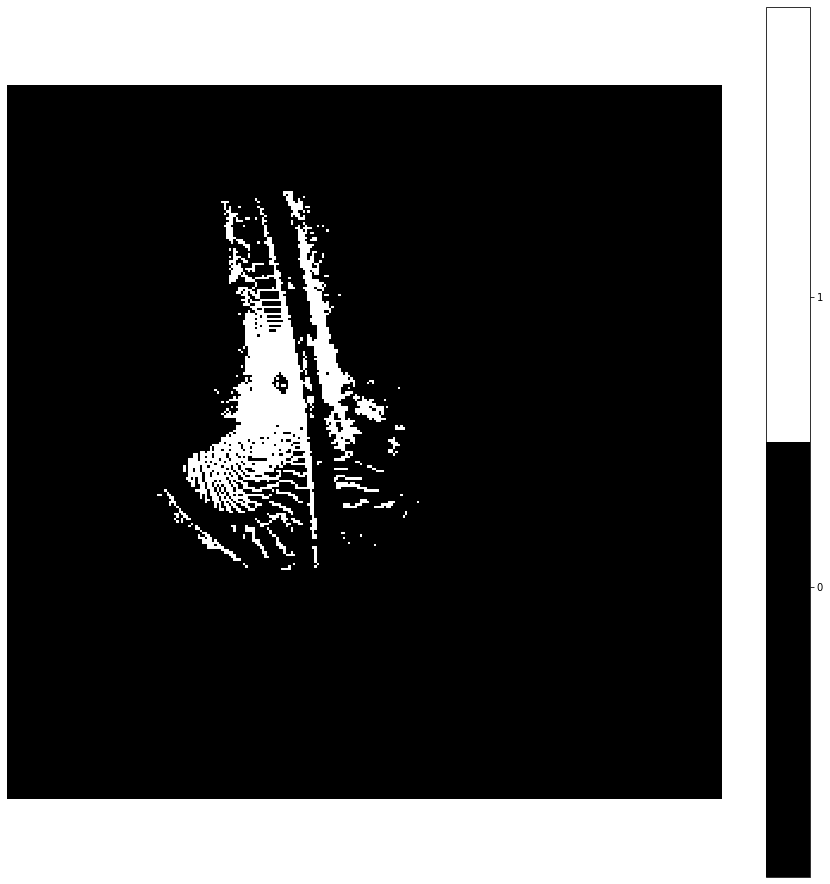

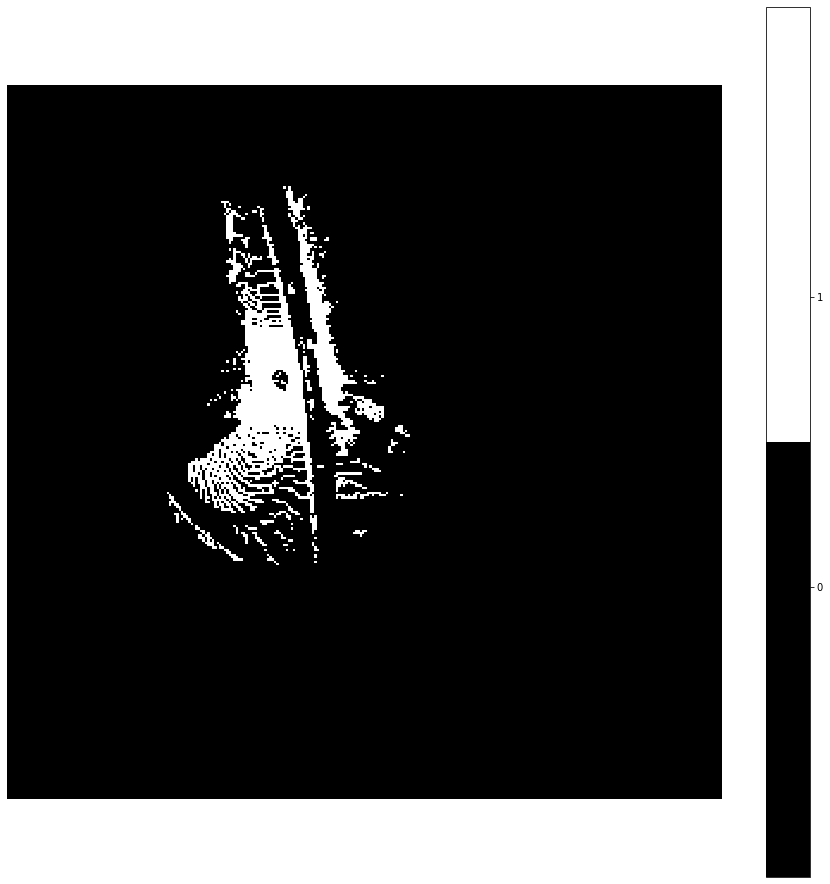

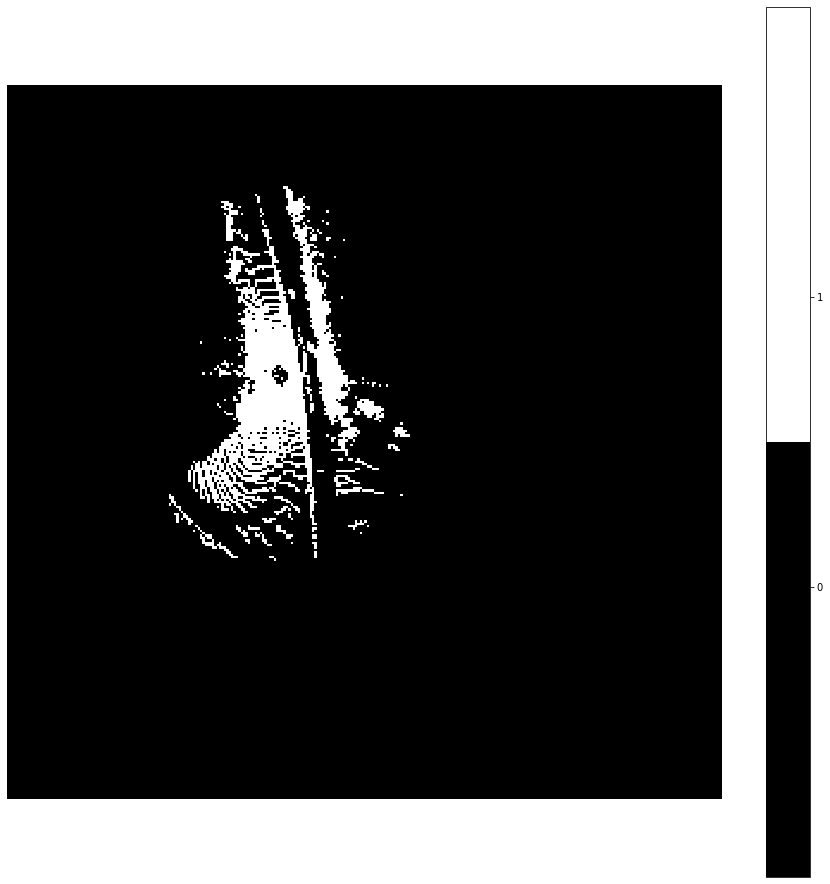

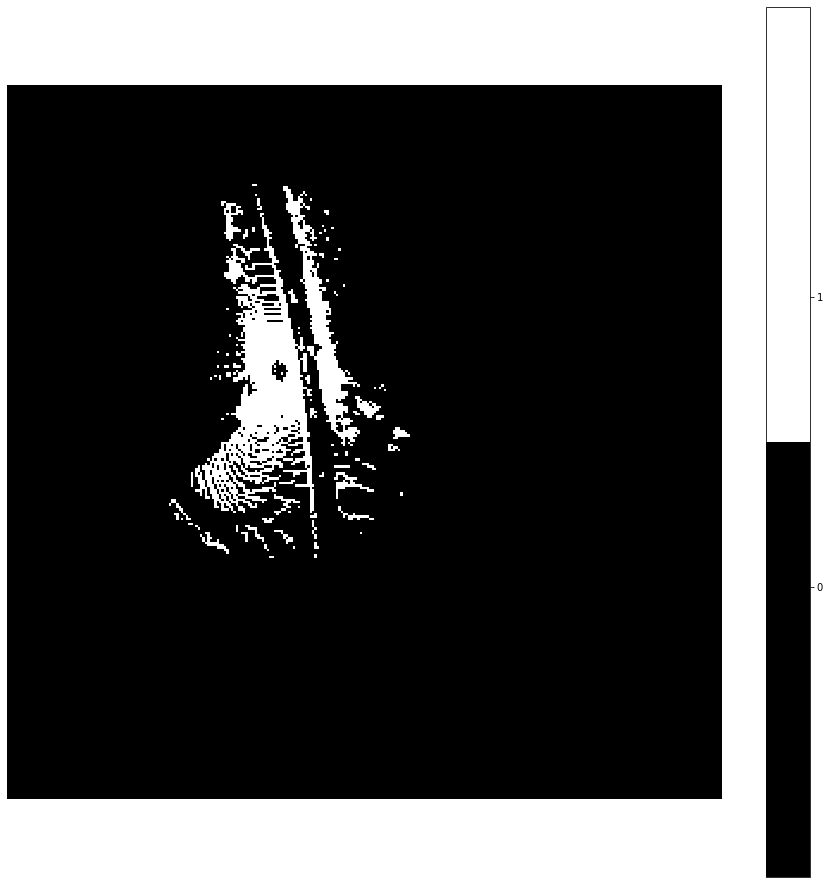

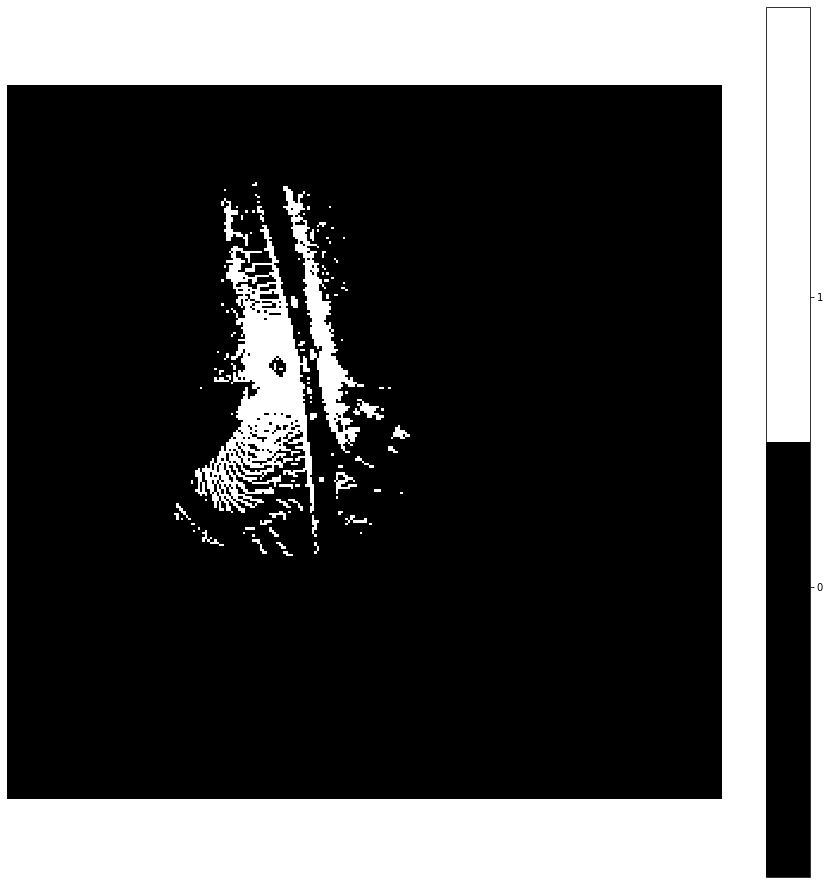

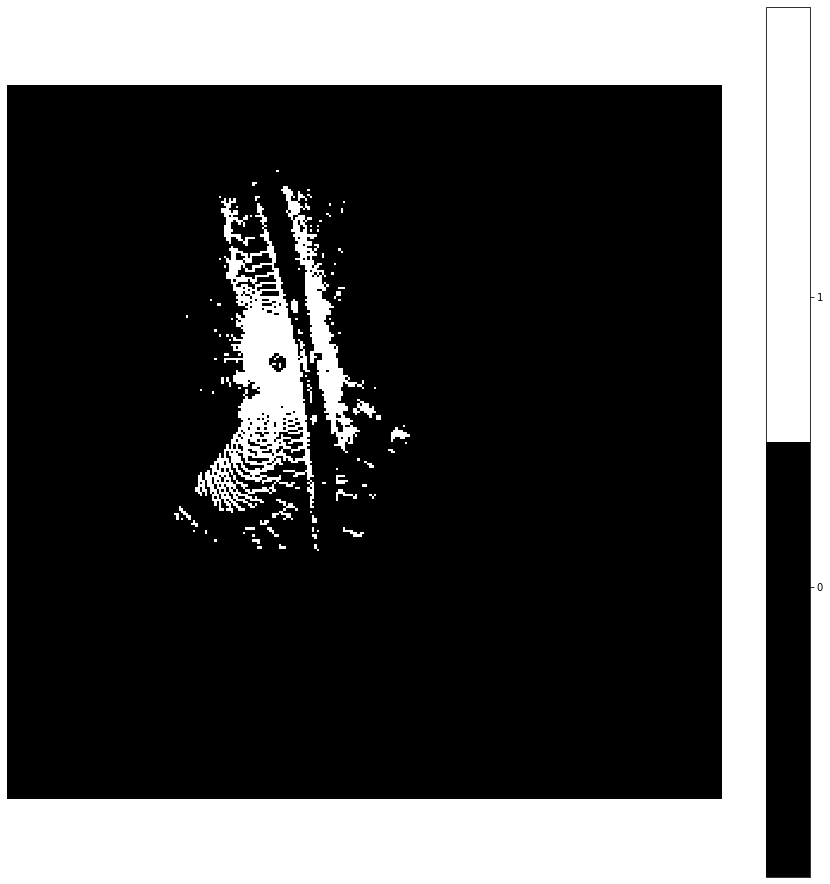

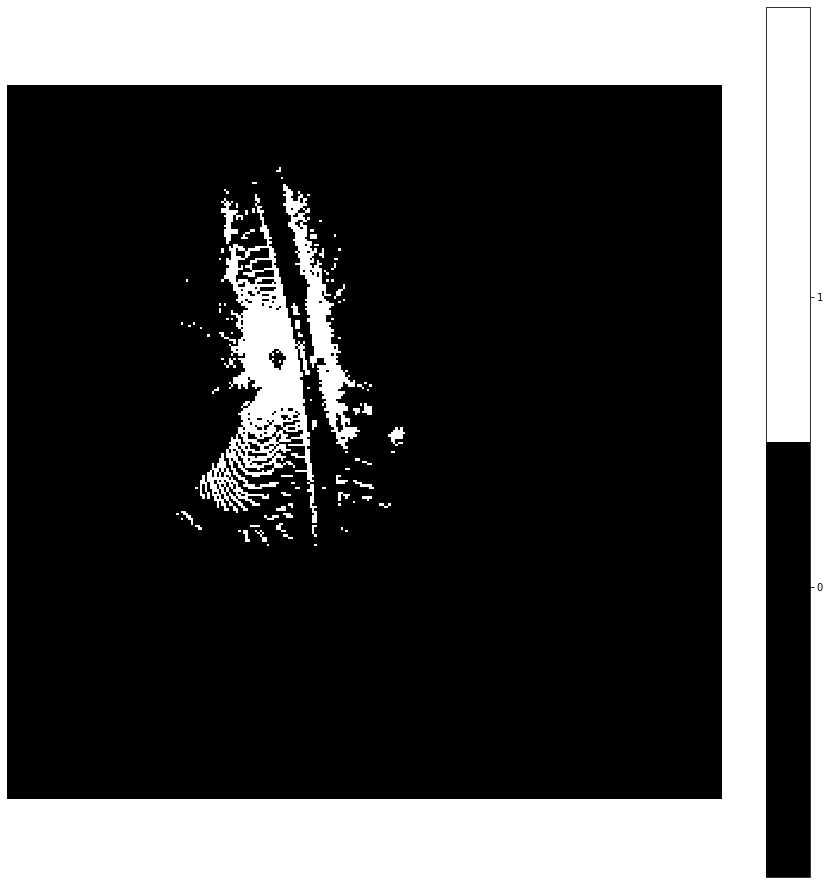

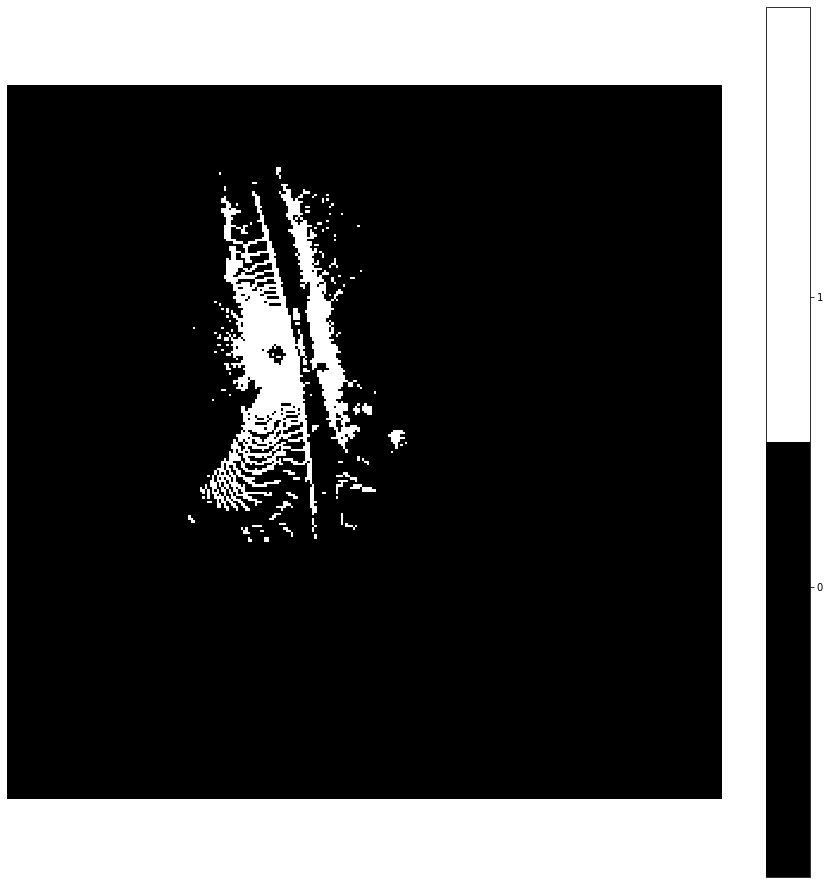

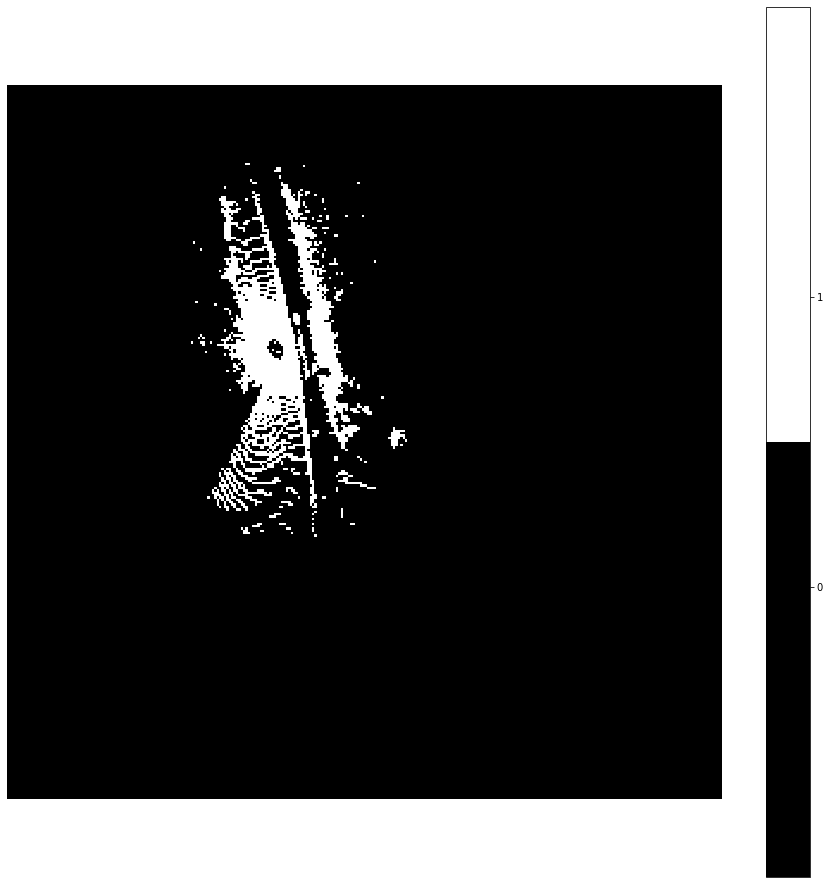

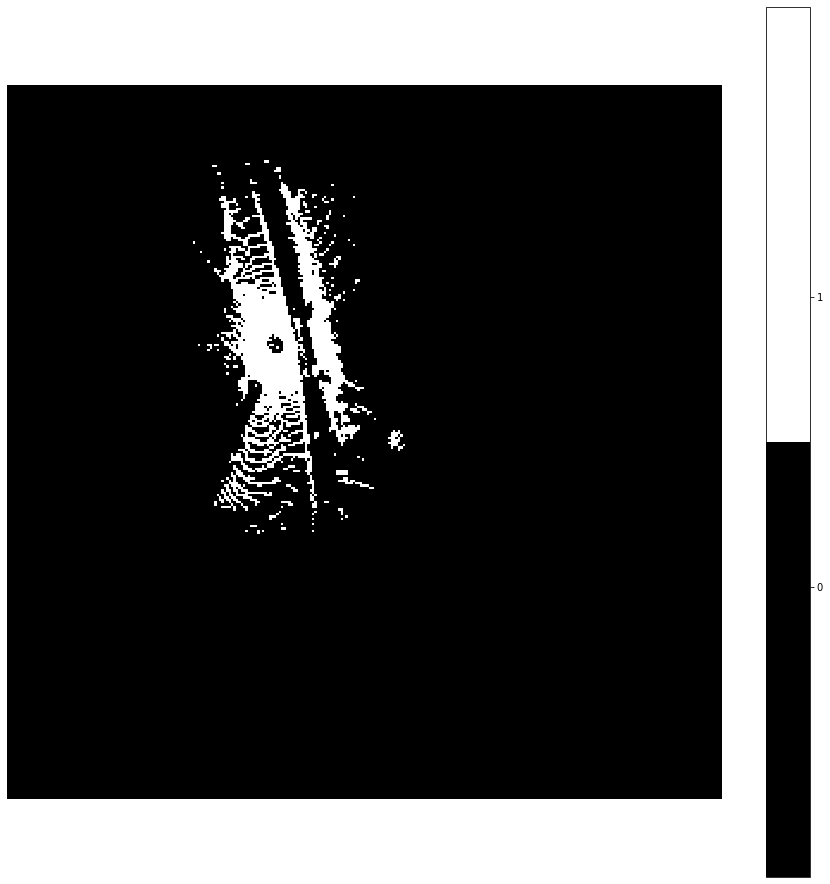

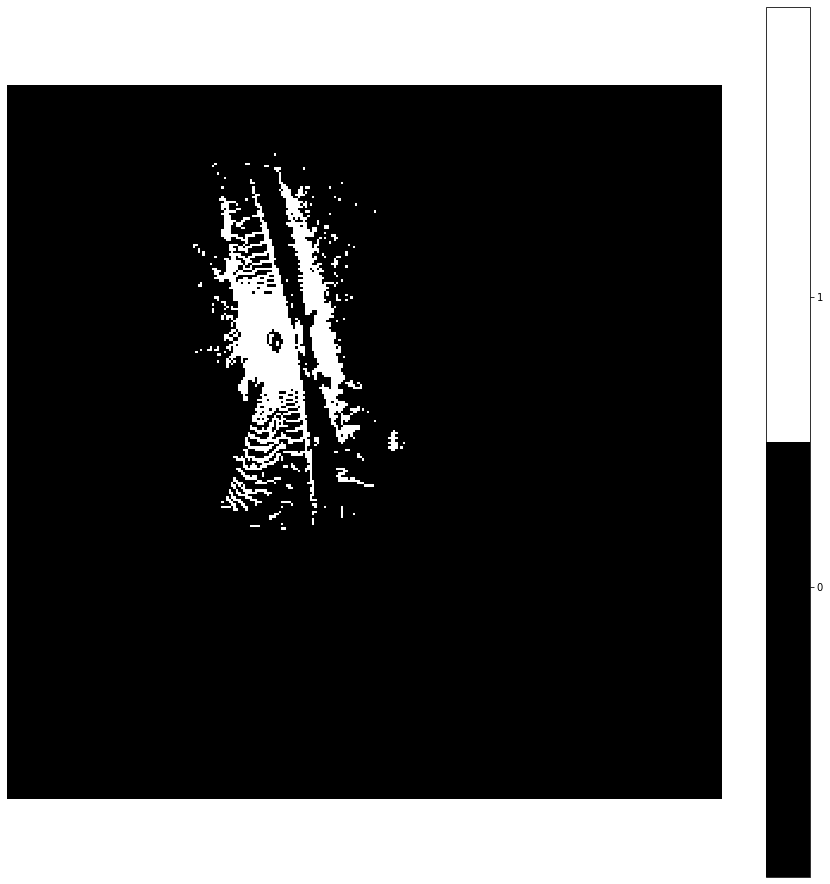

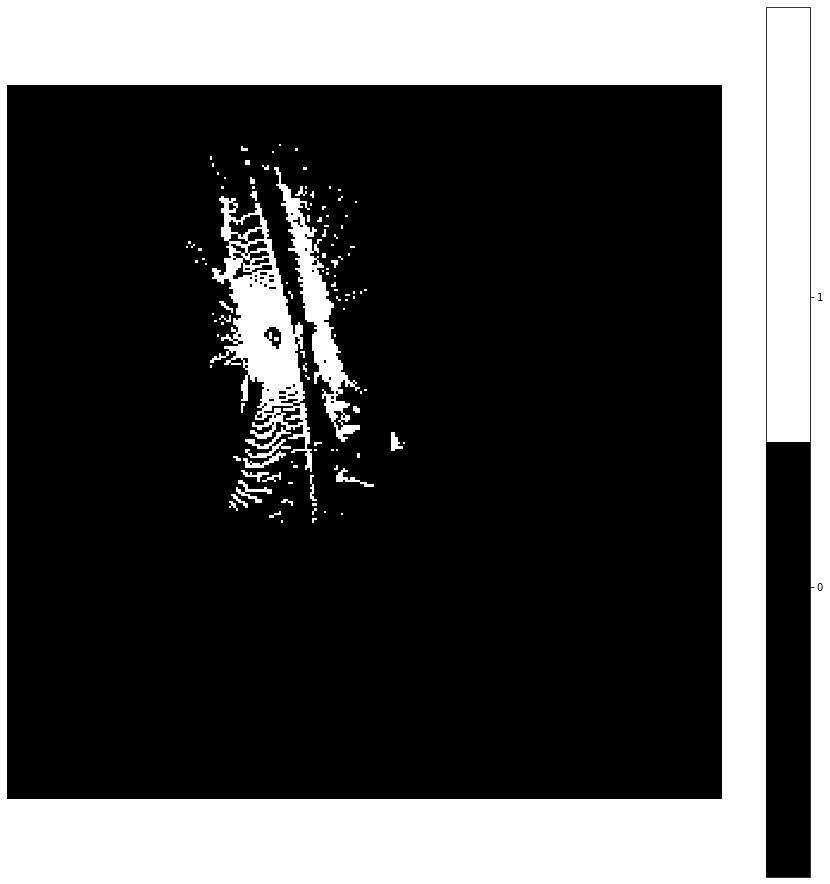

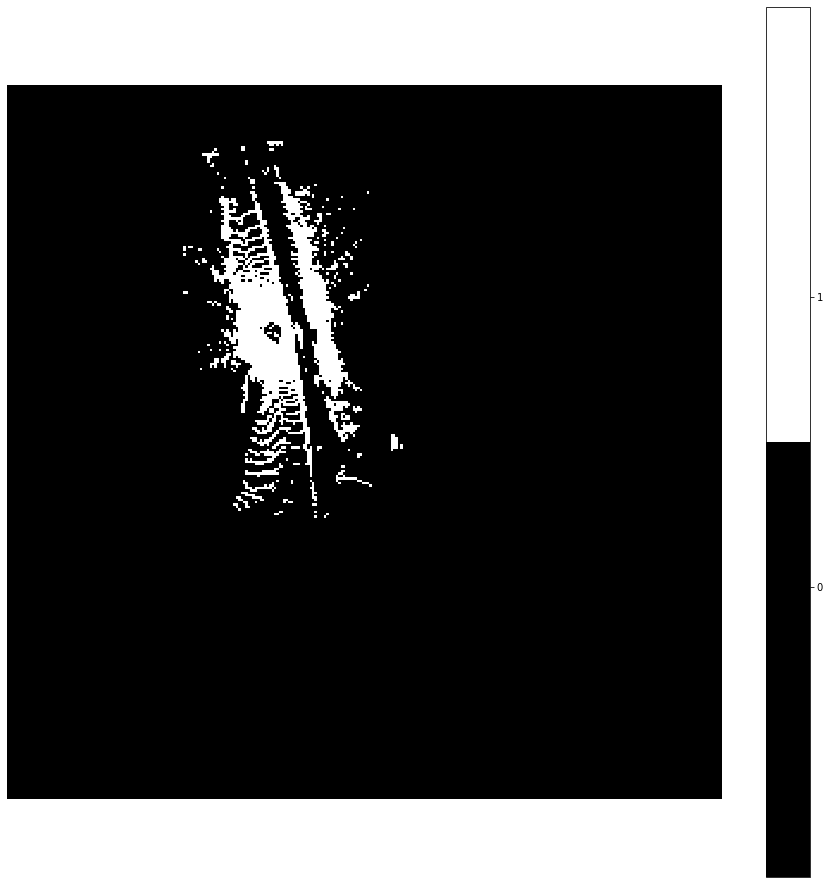

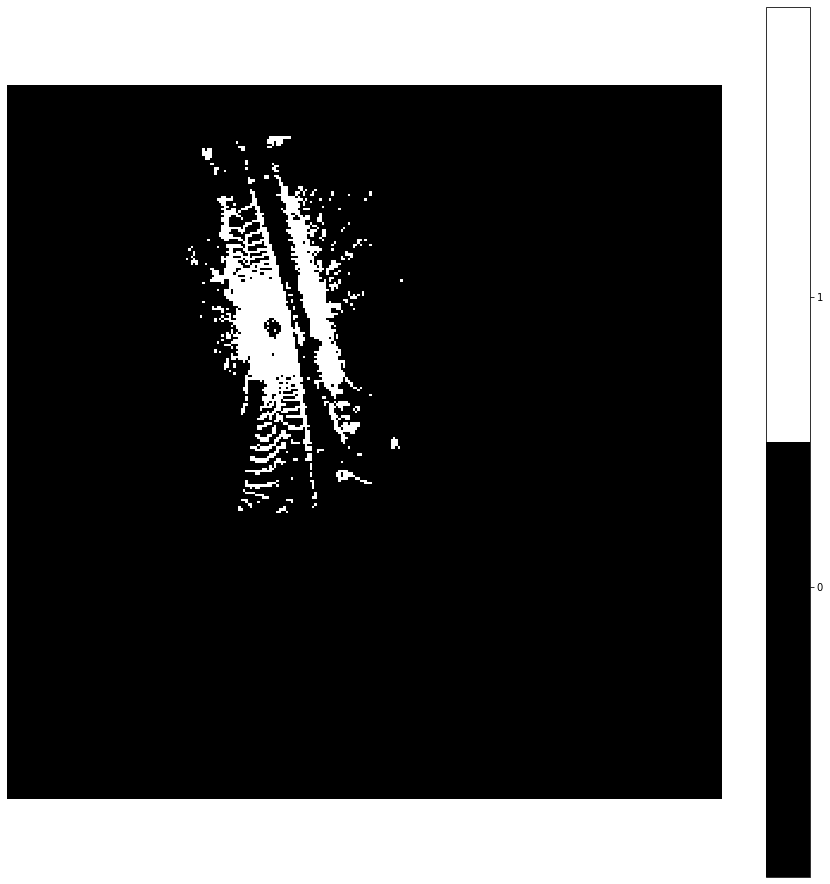

In [7]:

for i in range(len(occlist)):
    plot_occMap("occMap"+str(i),occlist[i])
    